In [1]:
import numpy as np
from numpy import random
import pandas as pd
from collections import Counter
import scipy
from random import choice
from scipy import stats
from scipy.stats import binom , poisson , norm , t
from matplotlib import pyplot as plt
import seaborn as sns
import pylab
from pylab import legend,plot,show,title,xlabel,ylabel
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import os

In [2]:
os.getcwd()

'C:\\Users\\HP'

In [3]:
os.chdir(r"D:\DBDA\RStudio And Stats\Credit Card Fraud Detection")

<h2>Loading Datasets</h2>

In [4]:
df1_ap = pd.read_csv("application_data.csv")
df1_ap.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   
5  ...                 0                0                0                0   
6  ...                 0                0                0                0   
7  ...                 0                0                0                0   
8  ...                 0                0                0                0   
9  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                        0.0                       0.0   
8                        0.0                       0.0   
9                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0         

In [5]:
df2_pv = pd.read_csv("previous_application.csv")
df2_pv.head(10)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   
6     2315218      175704         Cash loans          NaN              0.0   
7     1656711      296299         Cash loans          NaN              0.0   
8     2367563      342292         Cash loans          NaN              0.0   
9     2579447      334349         Cash loans          NaN              0.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   
6         0.0               NaN              NaN                    TUESDAY   
7         0.0               NaN              NaN                     MONDAY   
8         0.0               NaN              NaN                     MONDAY   
9         0.0               NaN              NaN                   SATURDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   
5                        8  ...                  XNA         18.0   
6                       11  ...                  XNA          NaN   
7                        7  ...                  XNA          NaN   
8                       15  ...                  XNA          NaN   
9                       15  ...                  XNA          NaN   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   
5        low_normal          Cash X-Sell: low            365243.0   
6               XNA                      Cash                 NaN   
7               XNA                      Cash                 NaN   
8               XNA                      Cash                 NaN   
9               XNA                      Cash                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   
5         -654.0                    -144.0         -144.0           -137.0   
6            NaN                       NaN            NaN              NaN   
7            NaN                       NaN            NaN              NaN   
8            NaN                       NaN          

Rows and Columns of Application Data

In [6]:
a = df1_ap.shape
print("Rows:",a[0])
print("Columns:",a[1])

Rows: 307511
Columns: 122


Rows and Columns of Previous Data

In [7]:
b = df2_pv.shape
print("Rows:",b[0])
print("Columns:",b[1])

Rows: 1670214
Columns: 37


<h2>Data Cleaning of Application CSV</h2>

Statistical Summaries for all numerical columns (mean , std , count .... )

In [8]:
df1_ap.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

Checking the column names in the Application dataset

In [9]:
df1_ap.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Checking the column names in the Previous dataset

In [10]:
df2_pv.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

Checking for null values in Application Dataset

<h2>ON APPLICATION DATA</h2>

In [11]:
df1_null = df1_ap.isnull().sum()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
df1_null

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

The values count are too large for this dataset and it is difficult to analyze so we took percentage of the columns for both the dataset

In [12]:
percent1 = round((100*df1_ap.isnull().sum()/len(df1_ap)),2)
percent1

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [13]:
print(len(percent1))

122


In [14]:
df1_ap.isnull().mean()

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000039
AMT_GOODS_PRICE                 0.000904
NAME_TYPE_SUITE                 0.004201
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                     0.659908
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

In [15]:
df1_ap = df1_ap.loc[:, df1_ap.isnull().mean() <= 0.19]

In [16]:
len(df1_ap.columns)

71

In [17]:
df1_ap.isnull().mean().round(2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
CNT_FAM_MEMBERS             

Total number of columns having null values

<h2>ON PREVIOUS DATA</h2>

In [18]:
print(len(df2_pv))

1670214


In [19]:
df2_pv.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [20]:
perc2 = round((100*df2_pv.isnull().sum()/len(df2_pv)),2)

In [21]:
perc2

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [22]:
df2_pv.isnull().mean()

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

In [23]:
df2_pv = df2_pv.loc[:, df2_pv.isnull().mean() <= 0.20]

In [24]:
len(df2_pv.columns)

23

In [25]:
df2_pv.isnull().mean().round(2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

 Filling the null values with 0 because most of the values are 0

In [26]:
df1_ap.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1_ap.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR

df1_ap.AMT_REQ_CREDIT_BUREAU_MON.fillna(df1_ap.AMT_REQ_CREDIT_BUREAU_MON.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_MON  

df1_ap.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(df1_ap.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_WEEK

df1_ap.AMT_REQ_CREDIT_BUREAU_DAY.fillna(df1_ap.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_DAY

df1_ap.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(df1_ap.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_HOUR

df1_ap.AMT_REQ_CREDIT_BUREAU_QRT.fillna(df1_ap.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0],inplace = True)   #AMT_REQ_CREDIT_BUREAU_QRT

df1_ap.NAME_TYPE_SUITE.fillna(df1_ap.NAME_TYPE_SUITE.mode()[0],inplace = True) #NAME_TYPE_SUITE

df1_ap.OBS_30_CNT_SOCIAL_CIRCLE.fillna( df1_ap.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_30_CNT_SOCIAL_CIRCLE

df1_ap.DEF_30_CNT_SOCIAL_CIRCLE.fillna( df1_ap.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_30_CNT_SOCIAL_CIRCLE

df1_ap.OBS_60_CNT_SOCIAL_CIRCLE.fillna( df1_ap.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #OBS_60_CNT_SOCIAL_CIRCLE

df1_ap.DEF_60_CNT_SOCIAL_CIRCLE.fillna( df1_ap.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0],inplace = True) #DEF_60_CNT_SOCIAL_CIRCLE

df1_ap.CNT_FAM_MEMBERS.fillna(df1_ap.CNT_FAM_MEMBERS.mode() , inplace = True) #CNT_FAM_MEMBERS

df1_ap.DAYS_LAST_PHONE_CHANGE.fillna(df1_ap.DAYS_LAST_PHONE_CHANGE.mode()[0],inplace = True) #DAYS_LAST_PHONE_CHANGE

df1_ap.EXT_SOURCE_2.fillna(df1_ap.EXT_SOURCE_2.median() , inplace = True) #EXT_SOURCE_2

C:\Users\HP\AppData\Local\Temp\ipykernel_10084\4019607290.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_ap.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(df1_ap.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0],inplace = True) #AMT_REQ_CREDIT_BUREAU_YEAR
C:\Users\HP\AppData\Local\Temp\ipykernel_10084\4019607290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [27]:
df1_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Checking the data-types of the columns

In [28]:
df1_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

 Converting data types of some columns which should'nt be float

In [29]:
df1_ap['NAME_CONTRACT_TYPE'] = df1_ap['NAME_CONTRACT_TYPE'].astype('category')
df1_ap['CODE_GENDER'] = df1_ap['CODE_GENDER'].astype('category')
df1_ap['NAME_TYPE_SUITE'] = df1_ap['NAME_TYPE_SUITE'].astype('category')
df1_ap['NAME_INCOME_TYPE'] = df1_ap['NAME_INCOME_TYPE'].astype('category')
df1_ap['NAME_EDUCATION_TYPE'] = df1_ap['NAME_EDUCATION_TYPE'].astype('category')
df1_ap['NAME_FAMILY_STATUS'] = df1_ap['NAME_FAMILY_STATUS'].astype('category')
df1_ap['NAME_HOUSING_TYPE'] = df1_ap['NAME_HOUSING_TYPE'].astype('category')
df1_ap['WEEKDAY_APPR_PROCESS_START'] = df1_ap['WEEKDAY_APPR_PROCESS_START'].astype('category')
df1_ap['ORGANIZATION_TYPE'] = df1_ap['ORGANIZATION_TYPE'].astype('category')

Removing the unwanted columns from the application_dataset

In [30]:
trash = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [31]:
df1_ap.drop(labels=trash, axis=1, inplace=True)

Checking the Gender and Organization column for any error

In [32]:
df1_ap.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [33]:
# Replacing the 'XNA' values with the Females as majority is Females & it won't affect our analysis
df1_ap.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10084\3341775996.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1_ap.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)


In [34]:
# Confirmation of changes in the Gender column
df1_ap.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [35]:
df1_ap.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

In [36]:
# dropping the rows of total 55374 have 'XNA' values in the organization type column
df1_ap = df1_ap.drop(df1_ap.loc[df1_ap['ORGANIZATION_TYPE']=='XNA'].index)

In [37]:
df1_ap.ORGANIZATION_TYPE.value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

Checking for the Imbalance Ratio

In [38]:
df1_ap.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

'Target=0' is the people those who are non-defaulters.

'Target=1' is the people those who are defaulters.

C:\Users\HP\AppData\Local\Temp\ipykernel_10084\482925100.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET',data=df1_ap,palette='Paired')


Text(0, 0.5, 'Count')

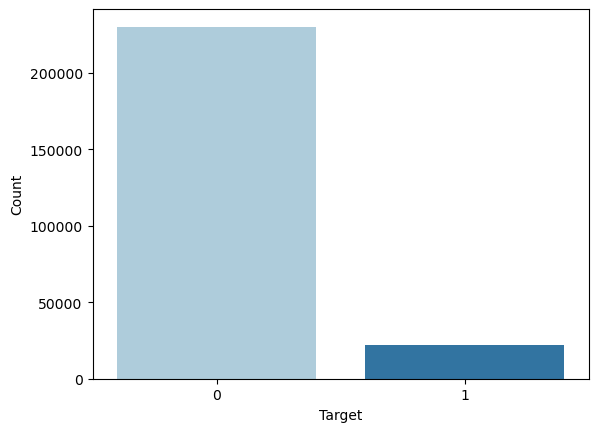

In [39]:
sns.countplot(x='TARGET',data=df1_ap,palette='Paired')
plt.xlabel('Target')
plt.ylabel('Count')

In [40]:
print("Non-Defaulters:",(230302/307511)*100)
print("Defaulters:",(21835/307511)*100)

Non-Defaulters: 74.89228027615272
Defaulters: 7.1005590043933395


In [48]:
tg0 = df1_ap.iloc[np.where(df1_ap['TARGET']==0)[0],]
tg1 = df1_ap.iloc[np.where(df1_ap['TARGET']==1)[0],]

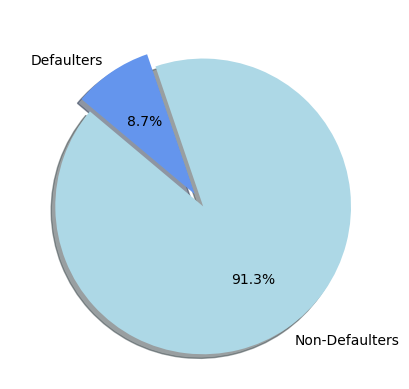

In [42]:
labels = 'Non-Defaulters', 'Defaulters'
sizes = [230302, 21835]
colors = ['#ADD8E6', '#6495ED']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

# Univariate Analysis

Plotting a bar chart for those having no difficulties in re-paying the loan i.e. the Target = 0 people.

In [43]:
# Creating bins for the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [44]:
bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]

slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df1_ap['AMT_INCOME_RANGE'] = pd.cut(df1_ap['AMT_INCOME_TOTAL'], bins_income, labels=slot_income)

In [45]:
bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df1_ap['AMT_CREDIT_RANGE']=pd.cut(df1_ap['AMT_CREDIT'], bins_credit, labels=slots_credit)

In [46]:
# Plotting for Income Range across various Gender.

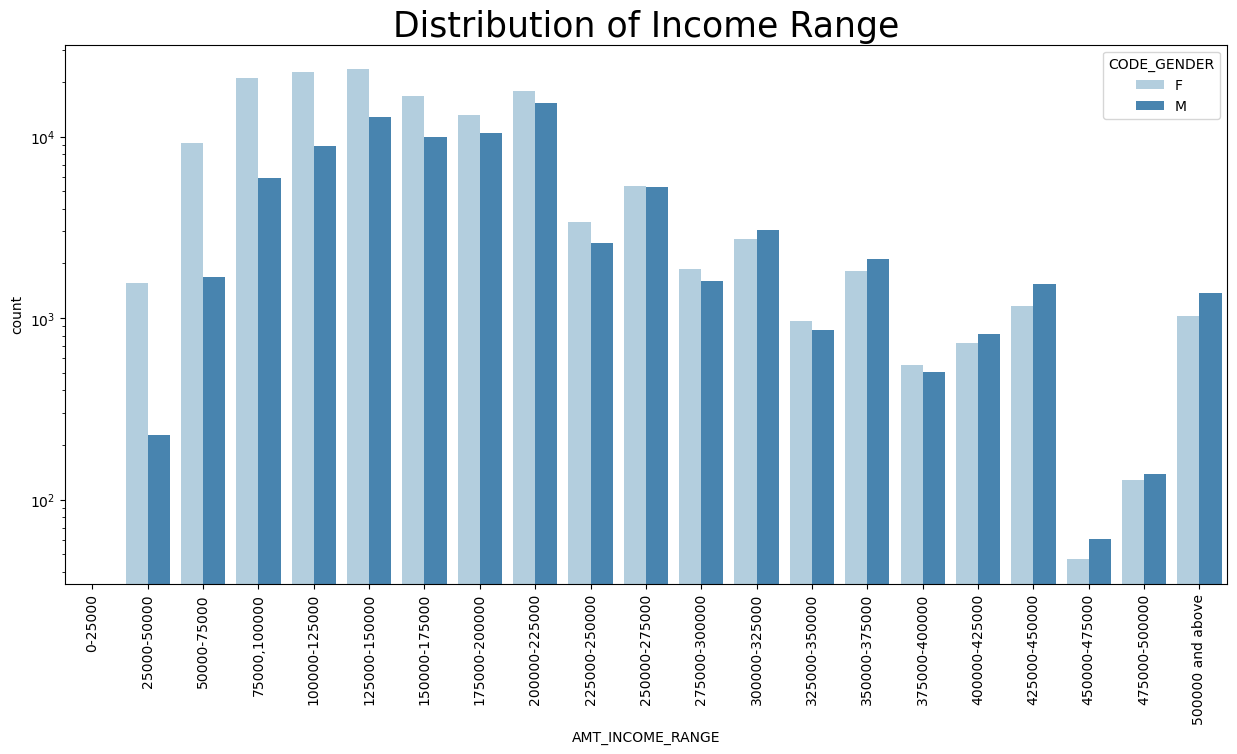

In [49]:
plt.figure(figsize=[15,7])
sns.countplot(data=tg0, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Blues')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range', fontsize=25)
plt.yscale('log')
plt.show()

Conclusions :

-  Income range from 125000 to 150000 is having more number of credits.
-  Very less count from range 450000-475000.
-  It seems that the females are more than male in having credit for range:125000 to 150000.

In [ ]:
# Plotting for the various Income types across various Gender.

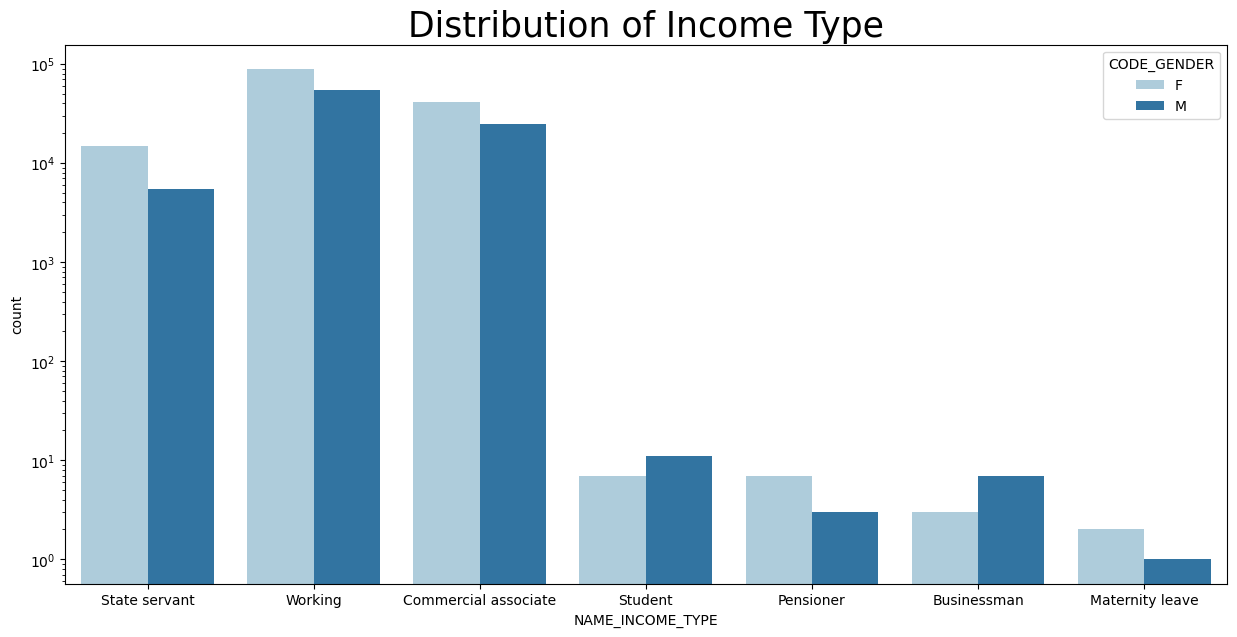

In [50]:
plt.figure(figsize=[15,7])
sns.countplot(data=tg0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='Paired')
plt.title('Distribution of Income Type',fontsize=25)
plt.yscale('log')
plt.show()

Conclusion :
-  
It seems that working women have most credit than others.
- 
It seems that 'State Servant','Working' and 'Commercial Associate'have more credit counts compared to others
- .
It seems Women in 'Maternity leave' has less credit in comparison to others.

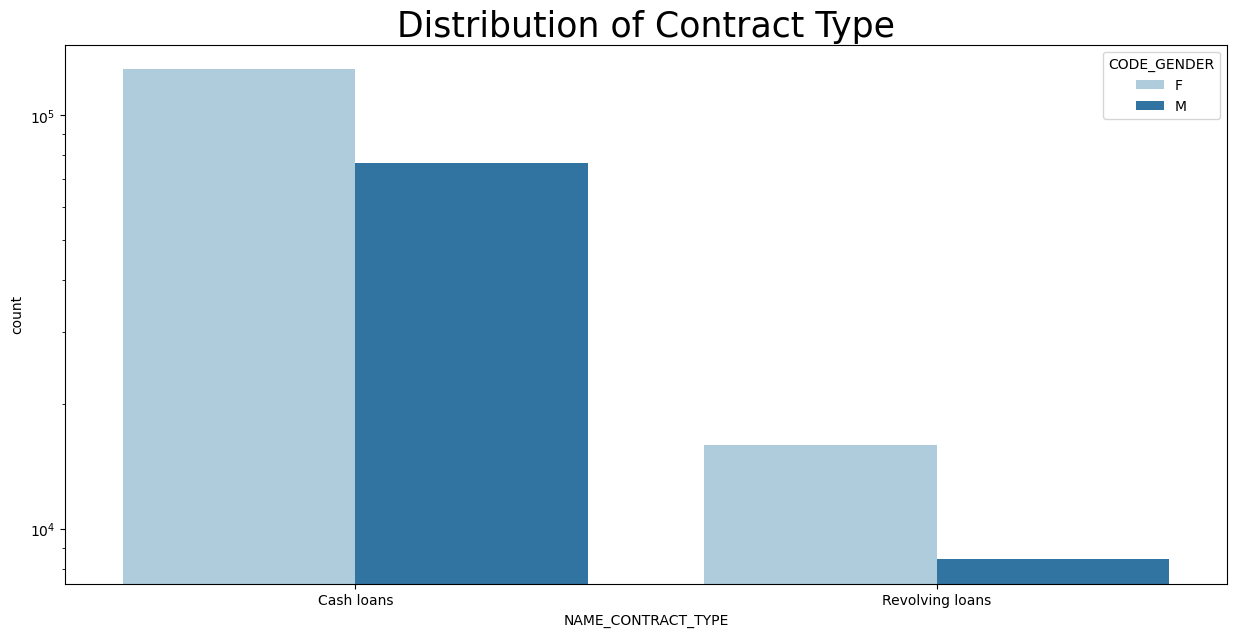

In [51]:
# Plotting for the Contract type across various Genders.
plt.figure(figsize=[15,7])
sns.countplot(data=tg0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Paired')
plt.title('Distribution of Contract Type',fontsize=25)
plt.yscale('log')
plt.show()

Conclusion :
-  
It seems that cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.  
Also, female applies more for Credit.

In [52]:
# Plotting for the various Organization Types

C:\Users\HP\AppData\Local\Temp\ipykernel_10084\2620000185.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tg0, y='ORGANIZATION_TYPE', order=tg0['ORGANIZATION_TYPE'].value_counts().index, palette='Paired')


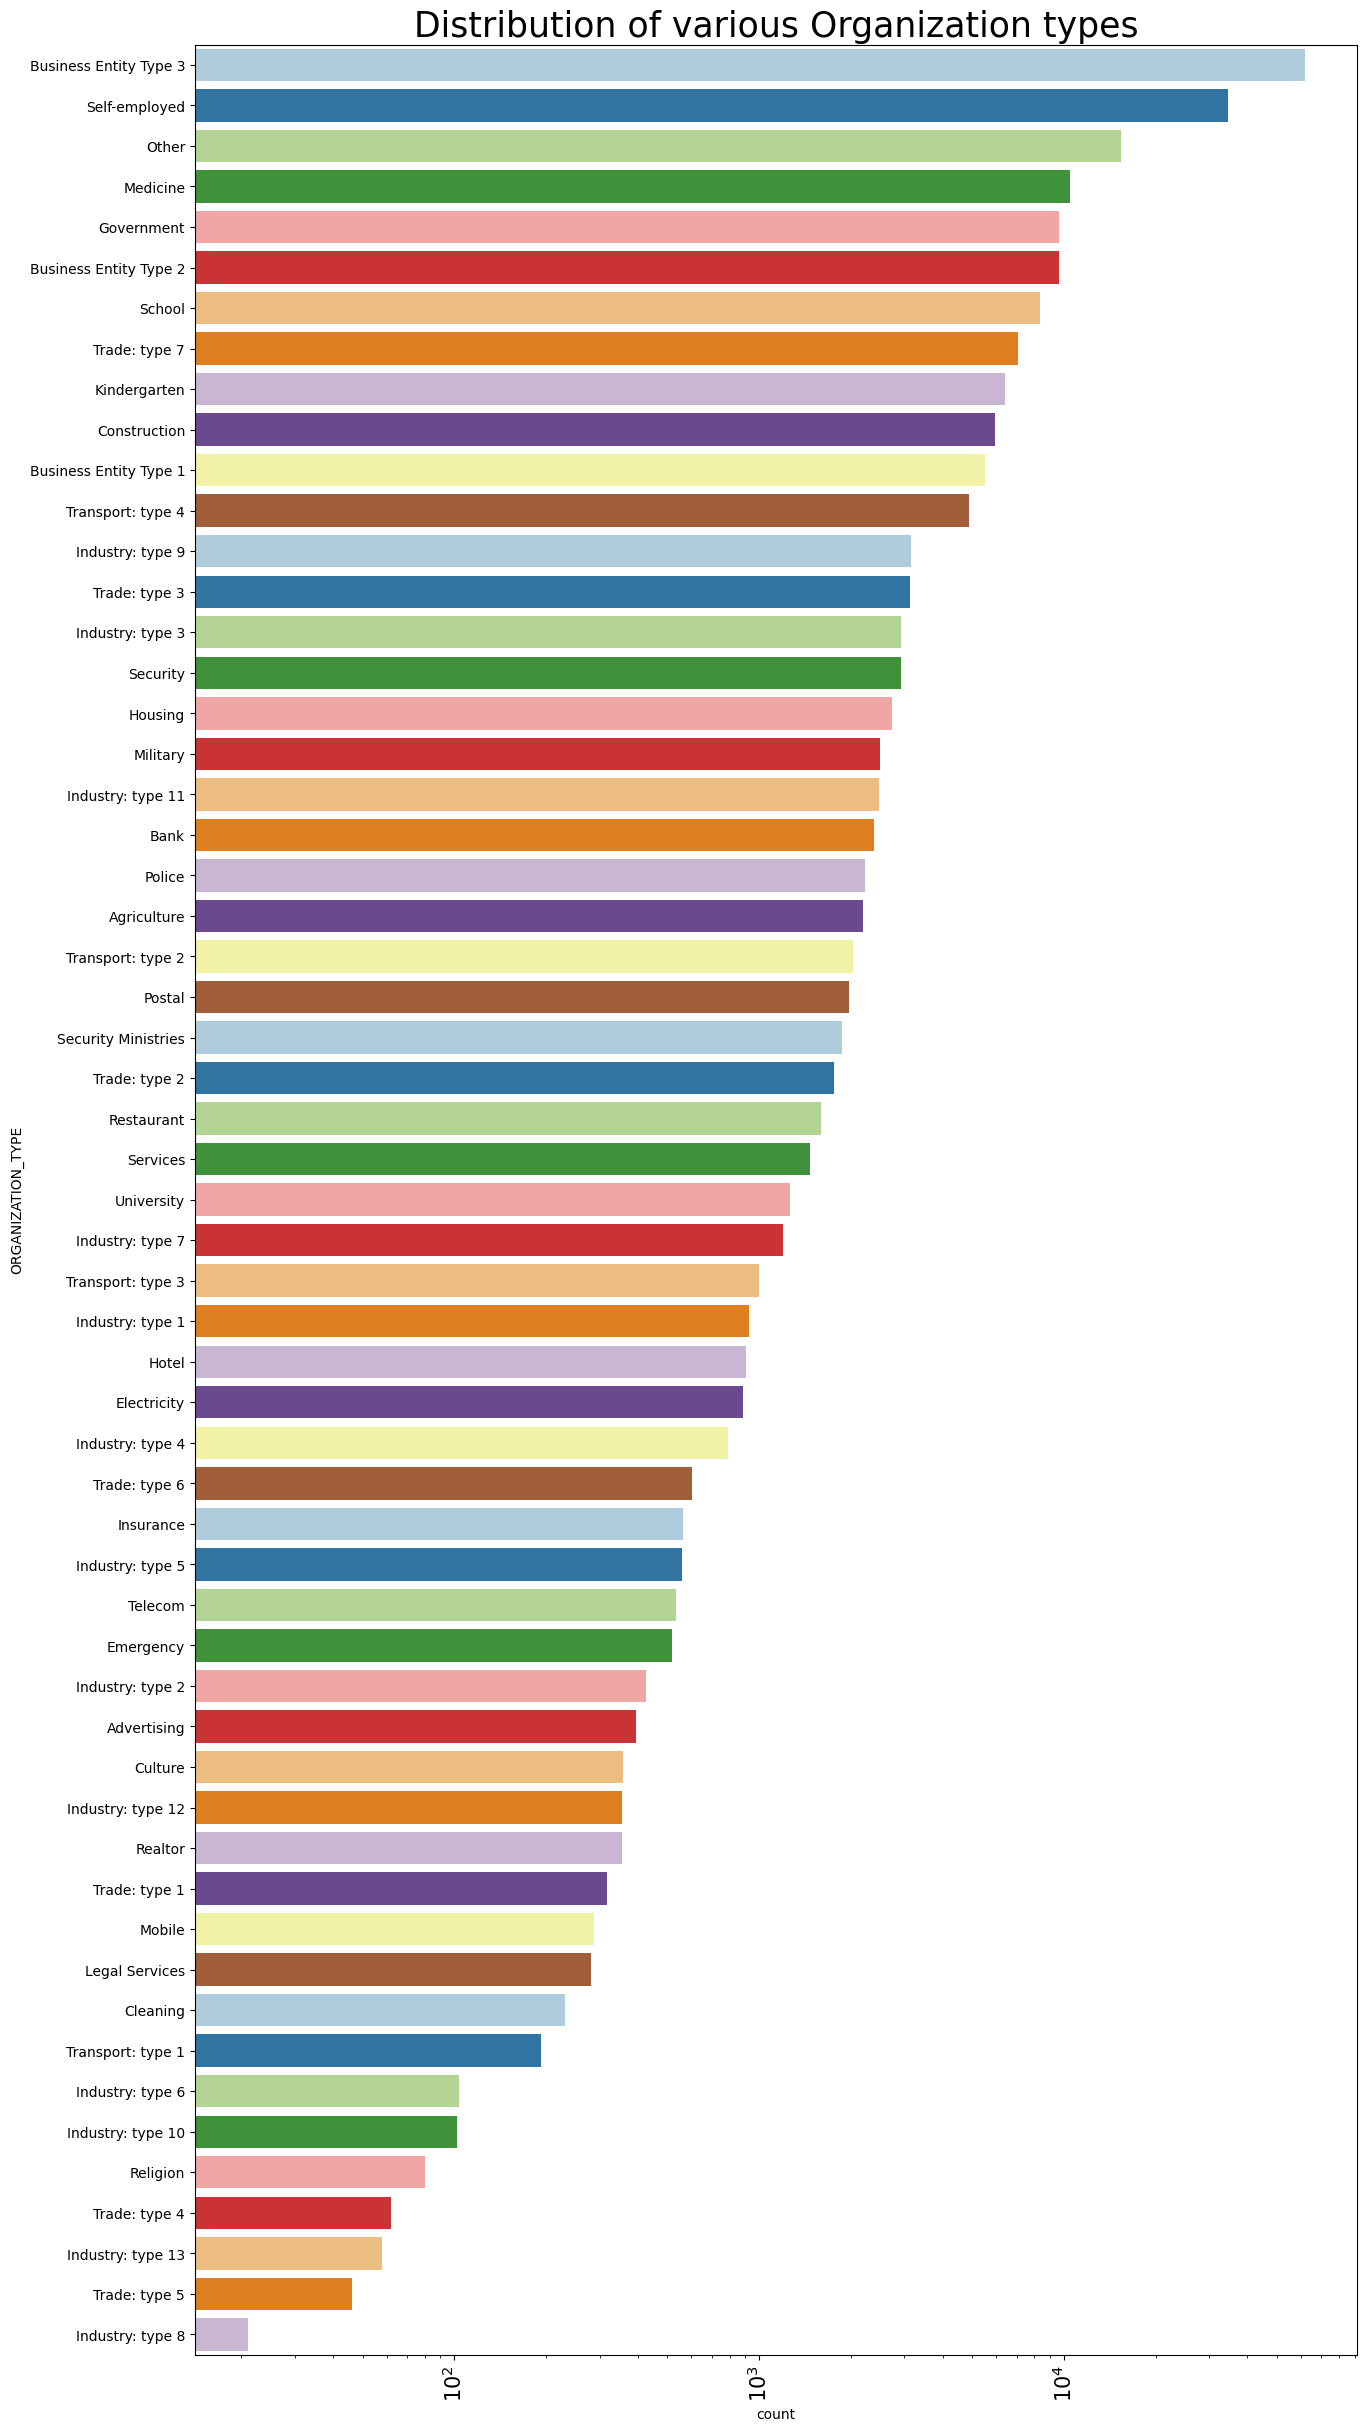

In [53]:
plt.figure(figsize=[15, 30])
sns.countplot(data=tg0, y='ORGANIZATION_TYPE', order=tg0['ORGANIZATION_TYPE'].value_counts().index, palette='Paired')
plt.xticks(rotation=90, fontsize=15)
plt.xscale('log')
plt.title("Distribution of various Organization types",fontsize=25)
plt.show()

Conclusions :

- Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
Less clients are from Industry. 

Plotting for those having difficulty in re-paying the loan i.e. Target = 1 people.

In [54]:
# Plotting for Income Range across various Gender.

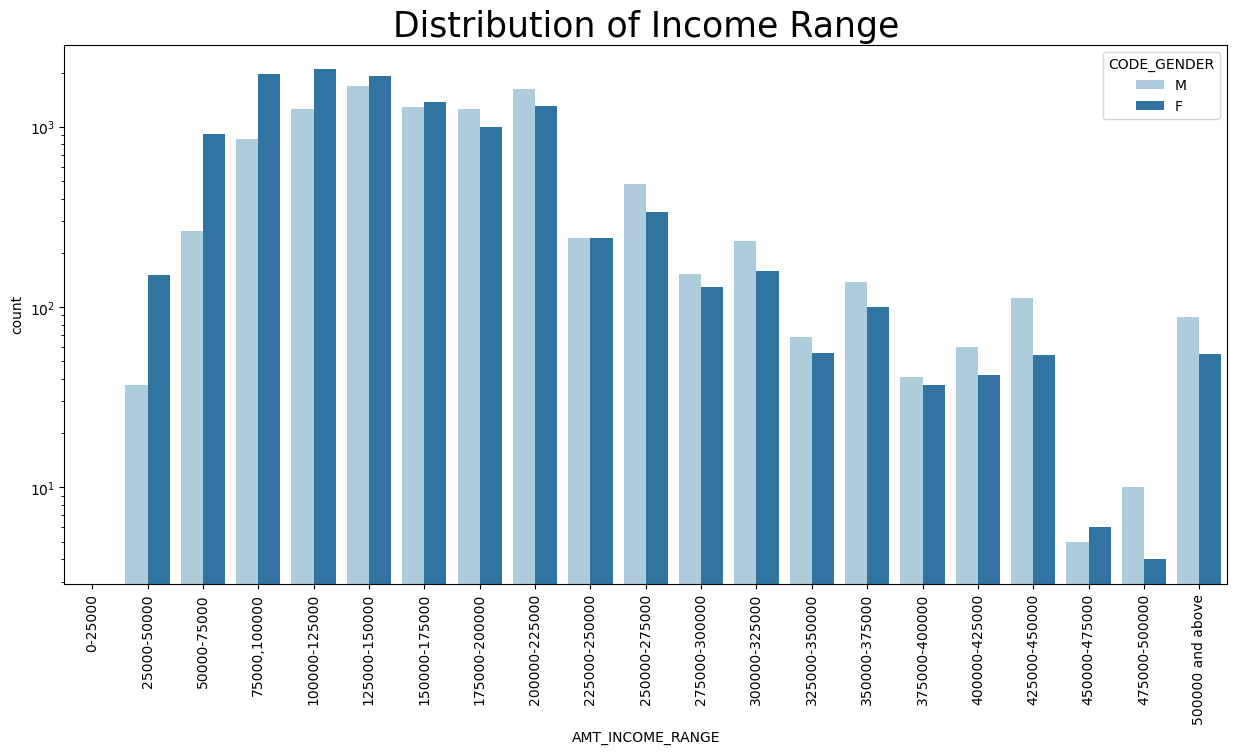

In [55]:
plt.figure(figsize=[15,7])
sns.countplot(data=tg1, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Paired')
plt.xticks(rotation=90)
plt.title('Distribution of Income Range',fontsize=25)
plt.yscale('log')
plt.show()

Conclusions :

- Male Counts are higher.
- Income range from 100000 to 200000 is having more number of credits.
- Less count for income range 450000-475000

In [56]:
# Plotting for the various Income types across various Gender.

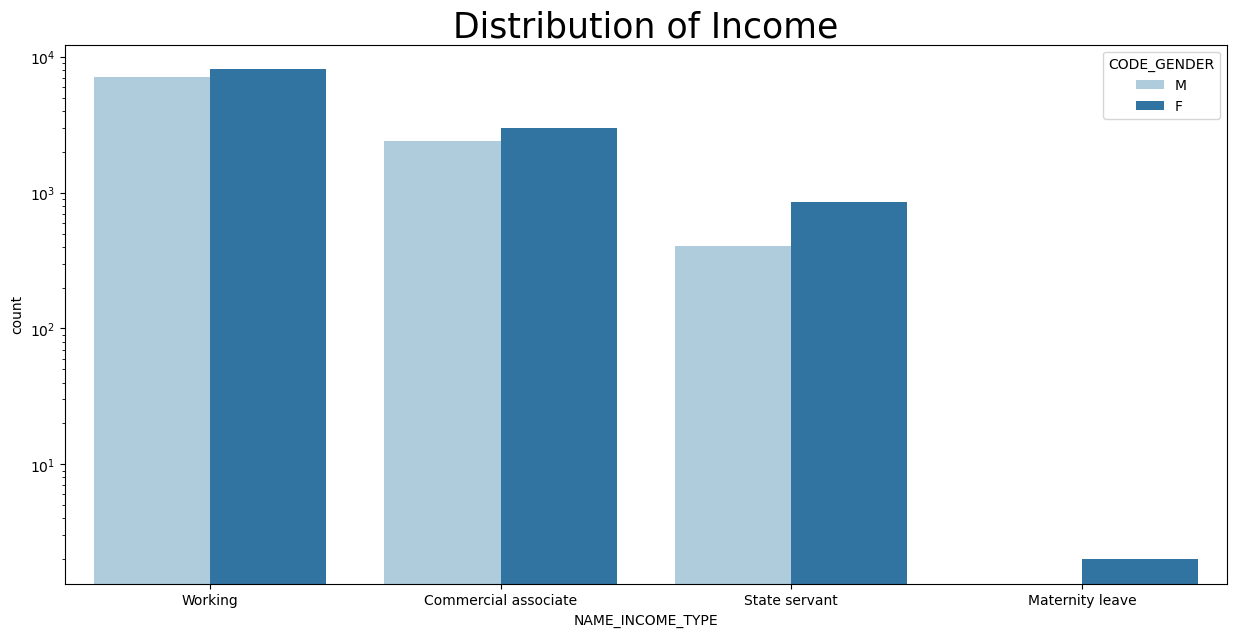

In [57]:
plt.figure(figsize=[15,7])
sns.countplot(data=tg1, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='Paired')
plt.title('Distribution of Income',fontsize=25)
plt.yscale('log')
plt.show()

Conclusions :

- For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
- For this Females are having more number of credits than male.
- Less number of credits for income type ‘Maternity leave’.

In [58]:
# Plotting for the Contract type across various Genders

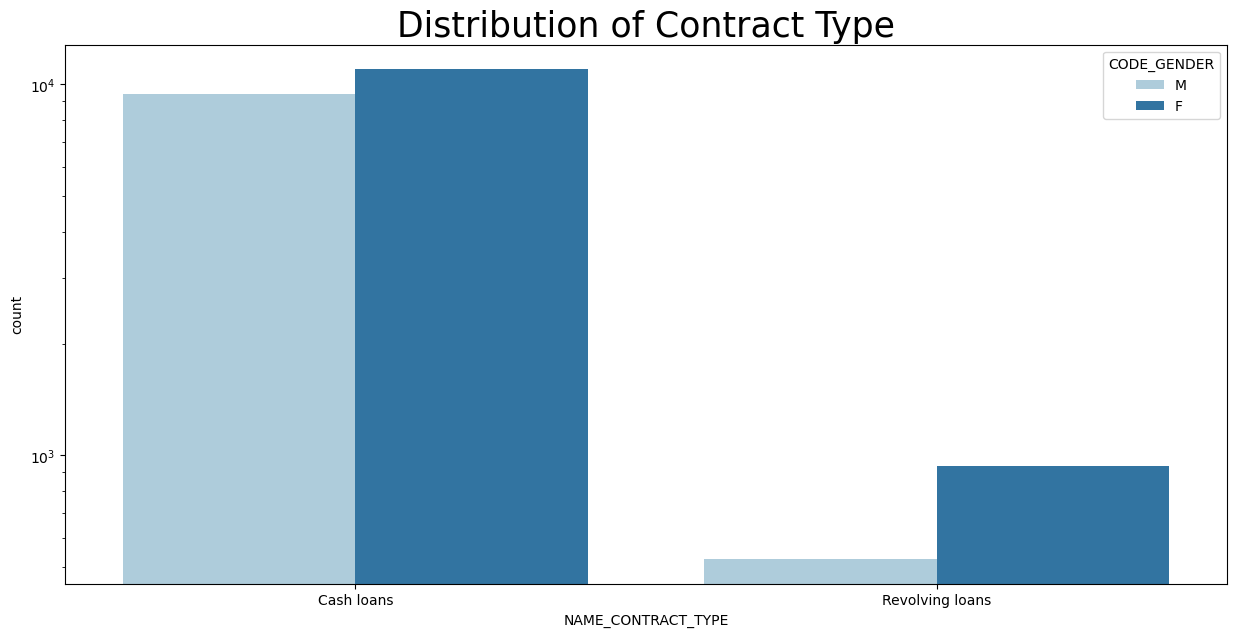

In [59]:
plt.figure(figsize=[15,7])
sns.countplot(data=tg1, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Paired')
plt.title('Distribution of Contract Type',fontsize=25)
plt.yscale('log')
plt.show()

Conclusions :

- For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
- For this also Female is leading for applying credits.

In [60]:
# Plotting for the various Organization Types

C:\Users\HP\AppData\Local\Temp\ipykernel_10084\2003969841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tg1, y='ORGANIZATION_TYPE', order=tg1['ORGANIZATION_TYPE'].value_counts().index, palette='Paired')


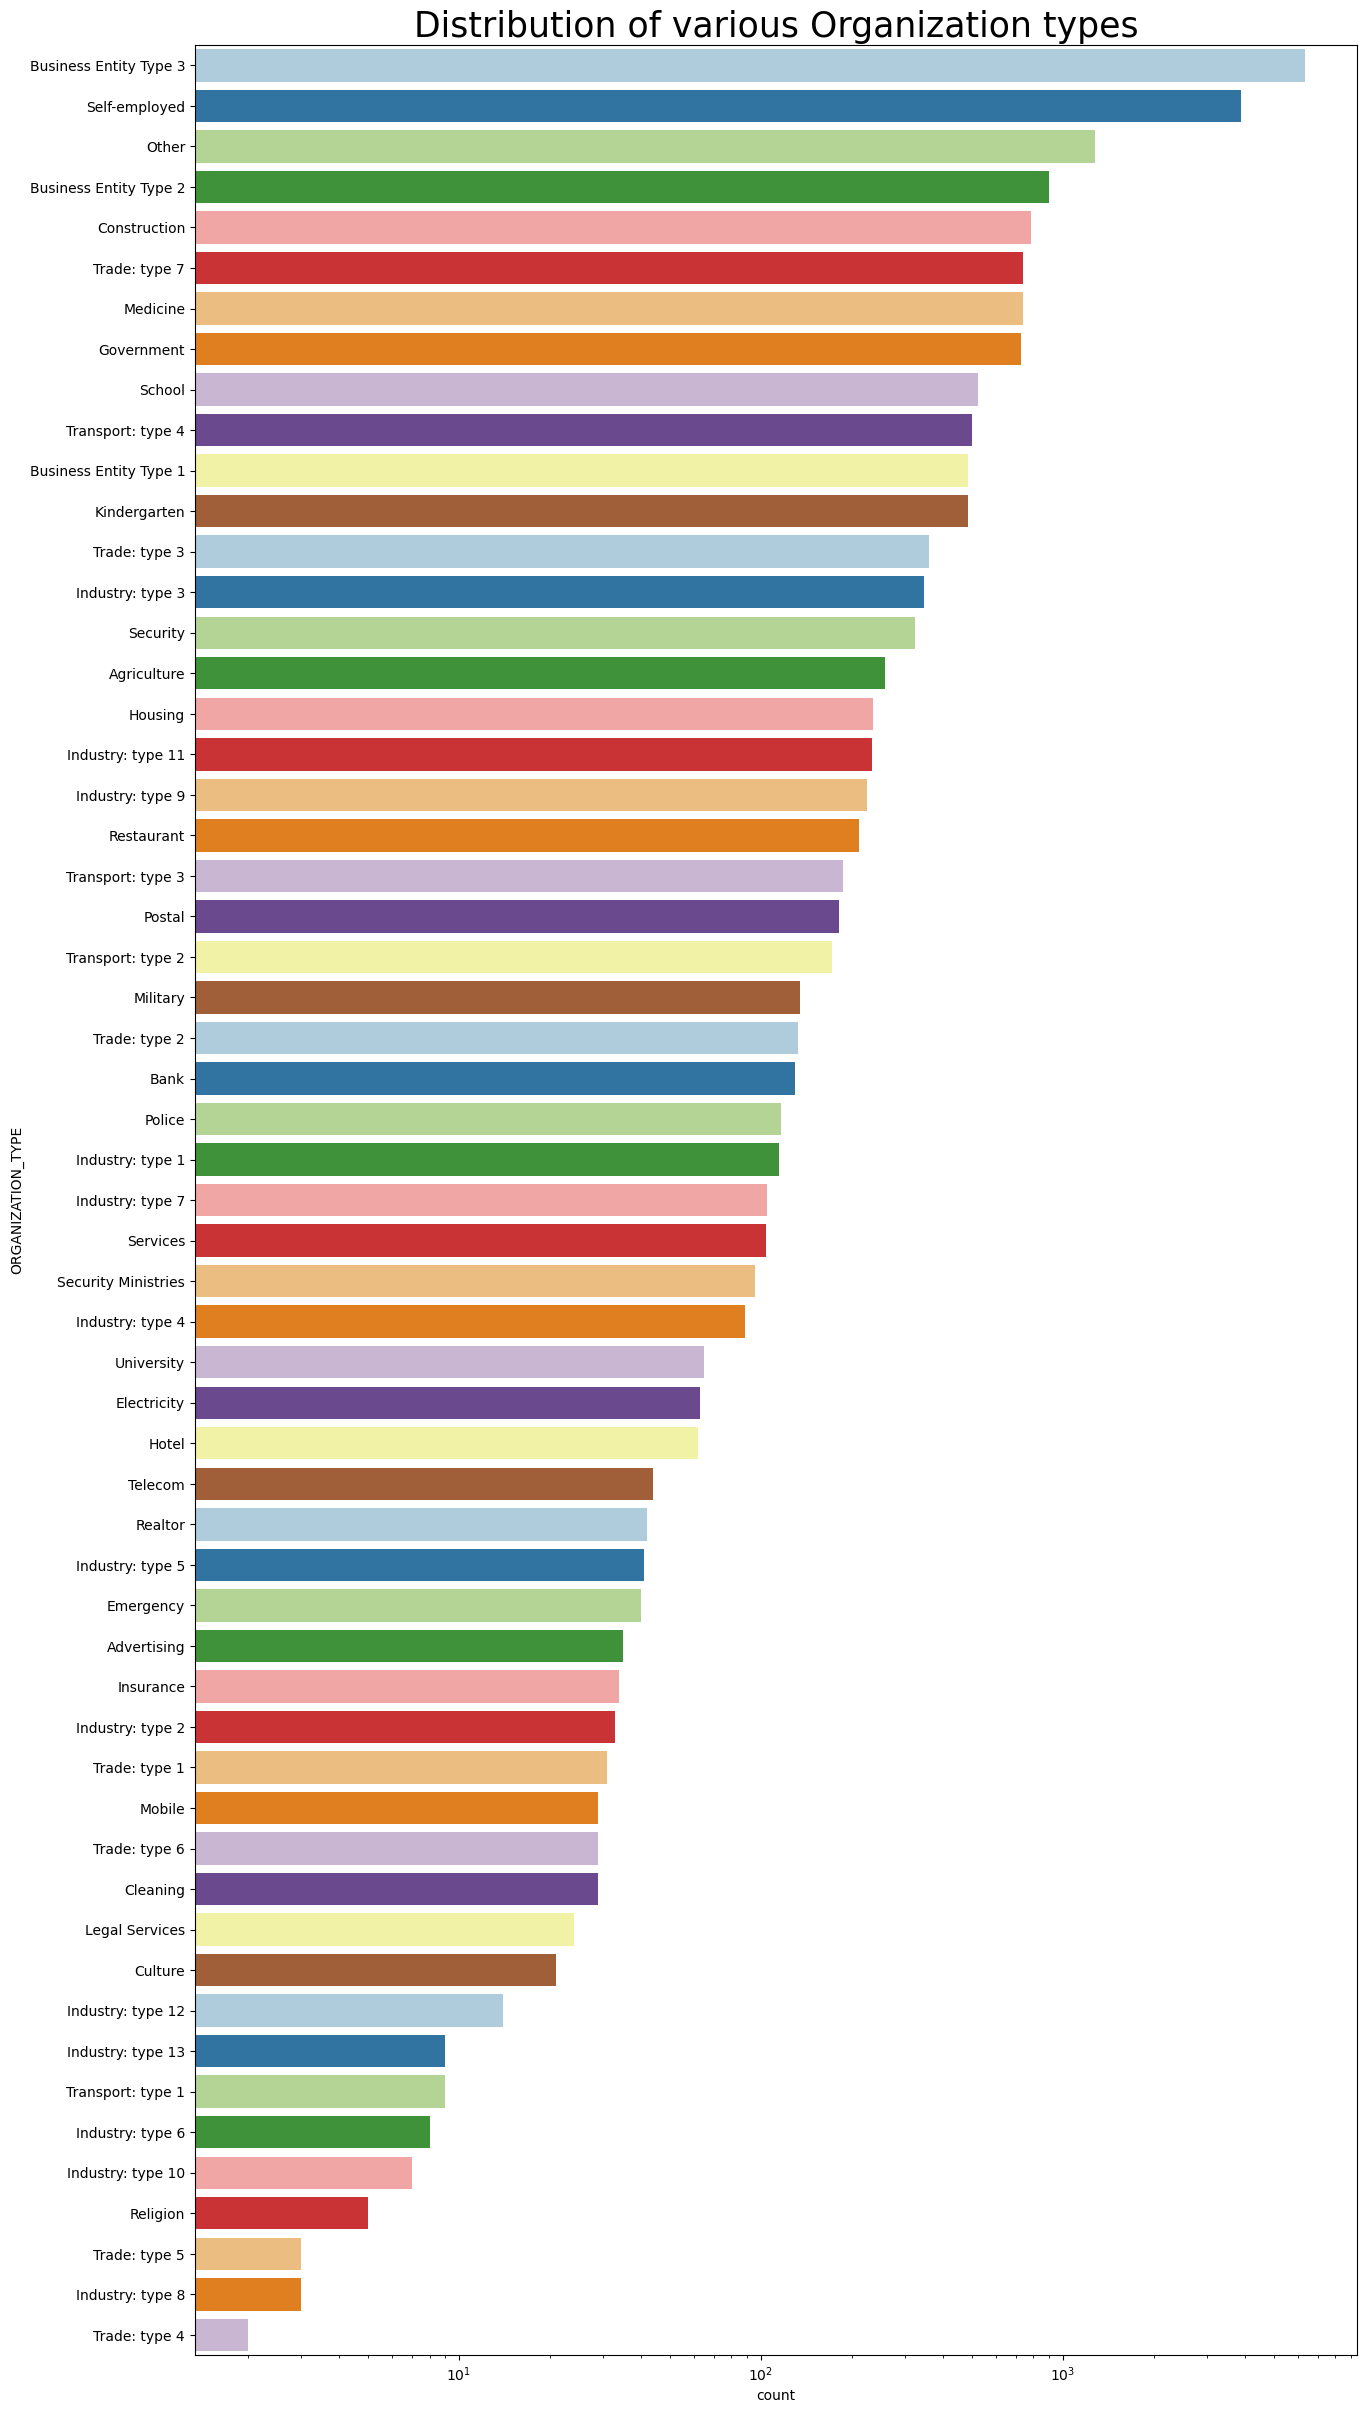

In [61]:
plt.figure(figsize=[15, 30])
sns.countplot(data=tg1, y='ORGANIZATION_TYPE', order=tg1['ORGANIZATION_TYPE'].value_counts().index, palette='Paired')
plt.title("Distribution of various Organization types",fontsize=25)
plt.xscale('log')
plt.show()

Conclusions :

- Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
- Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.
- Same as type 0 in distribution of organization type.

# Correlation

 Calculating the correlation among the target 0 

In [62]:
numr = tg0.select_dtypes(include='number') 
target_0_corr = numr.iloc[0:, 2:].corr()
target_0_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.009826   -0.018704   
AMT_INCOME_TOTAL                -0.009826          1.000000    0.326155   
AMT_CREDIT                      -0.018704          0.326155    1.000000   
AMT_ANNUITY                     -0.007619          0.400757    0.762117   
AMT_GOODS_PRICE                 -0.022286          0.333312    0.986726   
REGION_POPULATION_RELATIVE      -0.030352          0.169306    0.103876   
DAYS_BIRTH                       0.242462         -0.045543   -0.152659   
DAYS_EMPLOYED                    0.063036         -0.030102   -0.087500   
DAYS_REGISTRATION                0.162900          0.034508   -0.015180   
DAYS_ID_PUBLISH                 -0.117746         -0.026462   -0.034914   
CNT_FAM_MEMBERS                  0.893276         -0.003133    0.036760   
HOUR_APPR_PROCESS_START         -0.033031          0.055934    0.040390   
REG_REGION_NOT_LIVE_REGION      -0.023033          0.064868    0.020979   
REG_REGION_NOT_WORK_REGION      -0.016798          0.129765    0.050597   
LIVE_REGION_NOT_WORK_REGION     -0.006946          0.121288    0.052028   
REG_CITY_NOT_LIVE_CITY          -0.001566         -0.004264   -0.037527   
REG_CITY_NOT_WORK_CITY           0.010369         -0.020260   -0.038517   
LIVE_CITY_NOT_WORK_CITY          0.018414         -0.011238   -0.014834   
EXT_SOURCE_2                    -0.026082          0.137597    0.135790   
OBS_30_CNT_SOCIAL_CIRCLE         0.019474         -0.031292   -0.002932   
DEF_30_CNT_SOCIAL_CIRCLE         0.003481         -0.028196   -0.021726   
OBS_60_CNT_SOCIAL_CIRCLE         0.019148         -0.031106   -0.002902   
DEF_60_CNT_SOCIAL_CIRCLE         0.002439         -0.027641   -0.023820   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001019          0.002664   -0.002694   
AMT_REQ_CREDIT_BUREAU_DAY        0.000660          0.009039    0.006213   
AMT_REQ_CREDIT_BUREAU_WEEK       0.000047          0.009068    0.000279   
AMT_REQ_CREDIT_BUREAU_MON       -0.017476          0.054560    0.054174   
AMT_REQ_CREDIT_BUREAU_QRT       -0.000453          0.016234    0.022967   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.020784          0.038459   -0.027913   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                   -0.007619        -0.022286   
AMT_INCOME_TOTAL                0.400757         0.333312   
AMT_CREDIT                      0.762117         0.986726   
AMT_ANNUITY                     1.000000         0.766945   
AMT_GOODS_PRICE                 0.766945         1.000000   
REGION_POPULATION_RELATIVE      0.122223         0.107026   
DAYS_BIRTH                     -0.091573        -0.146827   
DAYS_EMPLOYED                  -0.052469        -0.088638   
DAYS_REGISTRATION               0.009813        -0.011845   
DAYS_ID_PUBLISH                -0.025990        -0.036697   
CNT_FAM_MEMBERS                 0.041226         0.034910   
HOUR_APPR_PROCESS_START         0.034044         0.049994   
REG_REGION_NOT_LIVE_REGION      0.039764         0.023520   
REG_REGION_NOT_WORK_REGION      0.076067         0.052065   
LIVE_REGION_NOT_WORK_REGION     0.071648         0.052349   
REG_CITY_NOT_LIVE_CITY         -0.018908        -0.036954   
REG_CITY_NOT_WORK_CITY         -0.028969        -0.039259   
LIVE_CITY_NOT_WORK_CITY        -0.014264        -0.015809   
EXT_SOURCE_2                    0.126762         0.142251   
OBS_30_CNT_SOCIAL_CIRCLE       -0.015595        -0.003356   
DEF_30_CNT_SOCIAL_CIRCLE       -0.022808        -0.023094   
OBS_60_CNT_SOCIAL_CIRCLE       -0.015413        -0.003367   
DEF_60_CNT_SOCIAL_CIRCLE       -0.023707        -0.024760   
AMT_REQ_CREDIT_BUREAU_HOUR      0.003875        -0.002260   
AMT_REQ_CREDIT_BUREAU_DAY       0.003147         0.006561   
AMT_REQ_CREDIT_BUREAU_WEEK      0.013919         0.000788   
AMT_REQ_CREDIT_BUREAU_MON       0.033056         0.055771   
AMT_REQ_CREDIT_BUREAU_QRT       0.014218         0.023353   
AMT_REQ_C

In [63]:
# Finding the top 10 correlations for Target = 0.

In [64]:
corr_0 = target_0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0

AMT_REQ_CREDIT_BUREAU_HOUR   OBS_60_CNT_SOCIAL_CIRCLE       0.000004
OBS_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000004
AMT_REQ_CREDIT_BUREAU_DAY    CNT_FAM_MEMBERS                0.000022
CNT_FAM_MEMBERS              AMT_REQ_CREDIT_BUREAU_DAY      0.000022
CNT_CHILDREN                 AMT_REQ_CREDIT_BUREAU_WEEK     0.000047
AMT_REQ_CREDIT_BUREAU_WEEK   CNT_CHILDREN                   0.000047
OBS_30_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_HOUR     0.000129
AMT_REQ_CREDIT_BUREAU_HOUR   OBS_30_CNT_SOCIAL_CIRCLE       0.000129
DEF_60_CNT_SOCIAL_CIRCLE     AMT_REQ_CREDIT_BUREAU_WEEK     0.000158
AMT_REQ_CREDIT_BUREAU_WEEK   DEF_60_CNT_SOCIAL_CIRCLE       0.000158
DAYS_BIRTH                   AMT_REQ_CREDIT_BUREAU_HOUR     0.000236
AMT_REQ_CREDIT_BUREAU_HOUR   DAYS_BIRTH                     0.000236
DEF_60_CNT_SOCIAL_CIRCLE     REGION_POPULATION_RELATIVE     0.000247
REGION_POPULATION_RELATIVE   DEF_60_CNT_SOCIAL_CIRCLE       0.000247
AMT_REQ_CREDIT_BUREAU_WEEK   REG_R

In [65]:
corr_0.tail(10)

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860421
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861492
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861492
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893276
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893276
AMT_GOODS_PRICE              AMT_CREDIT                     0.986726
AMT_CREDIT                   AMT_GOODS_PRICE                0.986726
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998492
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998492
dtype: float64

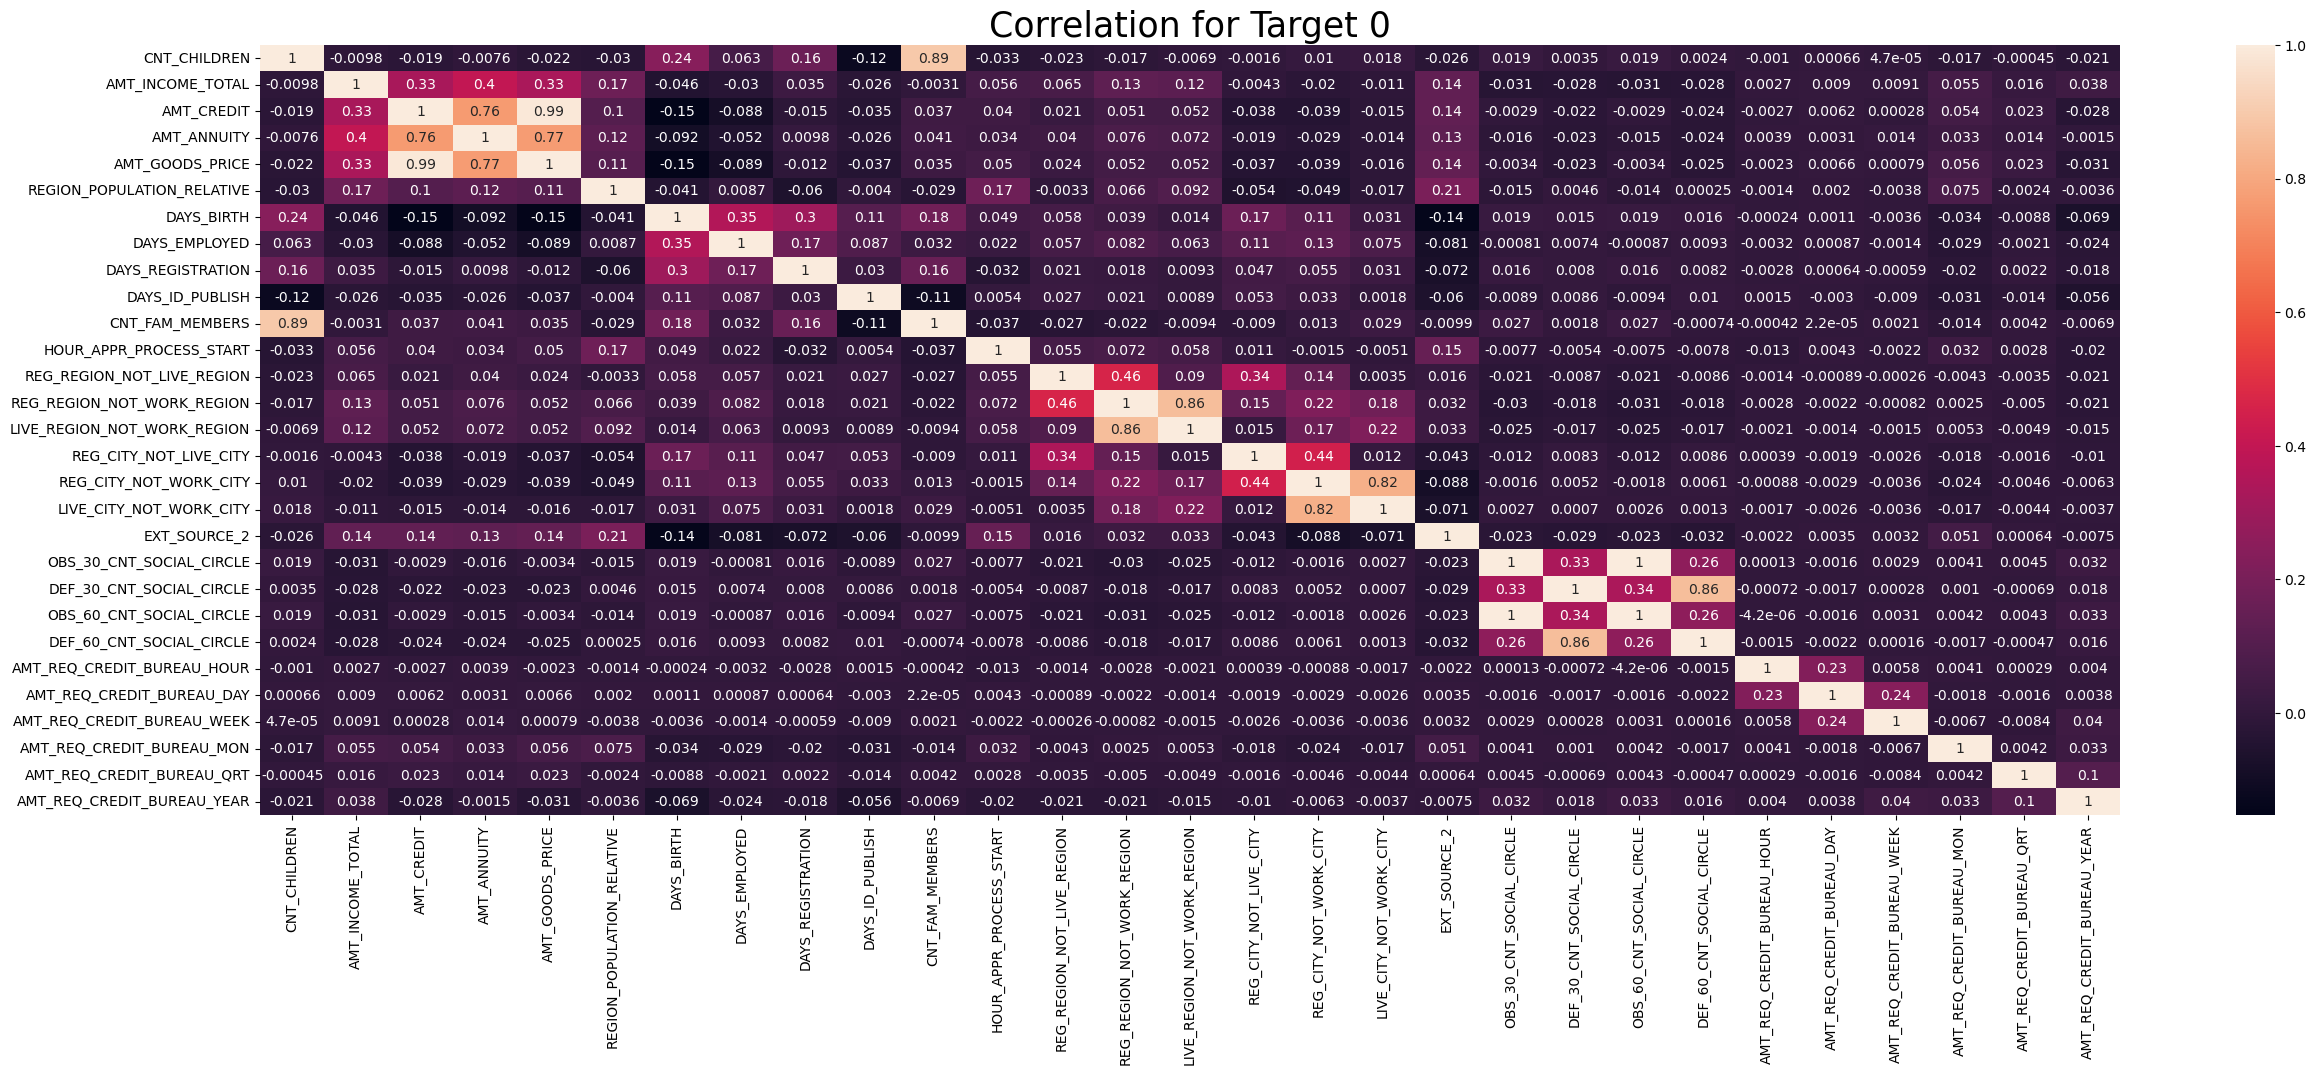

In [74]:
# Plotting the correlation for the Target_0.

plt.figure(figsize=[30,10])
sns.heatmap(target_0_corr, annot=True)
plt.title('Correlation for Target 0', fontsize=25)
plt.show()

Conclusions :

- Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
- Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
- Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
- Less children client have in densely populated area.
- Credit amount is higher to densely populated area.
- The income is also higher in densely populated area.

 Calculating the correlation among the target 1 

In [67]:
numr = tg1.select_dtypes(include='number') 
target_1_corr = numr.iloc[0:, 2:].corr()
target_1_corr

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.001872   -0.002074   
AMT_INCOME_TOTAL                 0.001872          1.000000    0.036484   
AMT_CREDIT                      -0.002074          0.036484    1.000000   
AMT_ANNUITY                      0.015653          0.043358    0.748708   
AMT_GOODS_PRICE                 -0.007711          0.036097    0.982799   
REGION_POPULATION_RELATIVE      -0.032019          0.008476    0.069220   
DAYS_BIRTH                       0.176563         -0.007822   -0.189512   
DAYS_EMPLOYED                    0.032627         -0.000039   -0.106003   
DAYS_REGISTRATION                0.126411         -0.003959   -0.033250   
DAYS_ID_PUBLISH                 -0.089861         -0.008858   -0.062405   
CNT_FAM_MEMBERS                  0.893829          0.003692    0.045420   
HOUR_APPR_PROCESS_START         -0.038923          0.012520    0.029054   
REG_REGION_NOT_LIVE_REGION      -0.032465          0.006951    0.020083   
REG_REGION_NOT_WORK_REGION      -0.039498          0.013245    0.035695   
LIVE_REGION_NOT_WORK_REGION     -0.028031          0.012287    0.035966   
REG_CITY_NOT_LIVE_CITY          -0.019278         -0.003664   -0.035325   
REG_CITY_NOT_WORK_CITY          -0.000876         -0.006886   -0.041392   
LIVE_CITY_NOT_WORK_CITY          0.016332         -0.004401   -0.017875   
EXT_SOURCE_2                    -0.010425          0.006125    0.126118   
OBS_30_CNT_SOCIAL_CIRCLE         0.028804         -0.005845    0.016521   
DEF_30_CNT_SOCIAL_CIRCLE         0.003023         -0.005837   -0.031438   
OBS_60_CNT_SOCIAL_CIRCLE         0.028046         -0.005744    0.017002   
DEF_60_CNT_SOCIAL_CIRCLE        -0.003162         -0.005272   -0.034792   
AMT_REQ_CREDIT_BUREAU_HOUR      -0.001269          0.000925   -0.005051   
AMT_REQ_CREDIT_BUREAU_DAY       -0.008695         -0.000071   -0.000943   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.006195          0.000885    0.013307   
AMT_REQ_CREDIT_BUREAU_MON       -0.015163          0.005141    0.061456   
AMT_REQ_CREDIT_BUREAU_QRT       -0.011841          0.000607   -0.003275   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.015698          0.005657   -0.008383   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.015653        -0.007711   
AMT_INCOME_TOTAL                0.043358         0.036097   
AMT_CREDIT                      0.748708         0.982799   
AMT_ANNUITY                     1.000000         0.749379   
AMT_GOODS_PRICE                 0.749379         1.000000   
REGION_POPULATION_RELATIVE      0.074406         0.076277   
DAYS_BIRTH                     -0.090497        -0.185578   
DAYS_EMPLOYED                  -0.049032        -0.111933   
DAYS_REGISTRATION               0.014302        -0.032070   
DAYS_ID_PUBLISH                -0.044289        -0.064713   
CNT_FAM_MEMBERS                 0.054884         0.042159   
HOUR_APPR_PROCESS_START         0.022524         0.042276   
REG_REGION_NOT_LIVE_REGION      0.033311         0.023552   
REG_REGION_NOT_WORK_REGION      0.063242         0.039425   
LIVE_REGION_NOT_WORK_REGION     0.061609         0.038486   
REG_CITY_NOT_LIVE_CITY         -0.013834        -0.035628   
REG_CITY_NOT_WORK_CITY         -0.019728        -0.041534   
LIVE_CITY_NOT_WORK_CITY        -0.006806        -0.017099   
EXT_SOURCE_2                    0.119685         0.136902   
OBS_30_CNT_SOCIAL_CIRCLE        0.000881         0.017286   
DEF_30_CNT_SOCIAL_CIRCLE       -0.024091        -0.026747   
OBS_60_CNT_SOCIAL_CIRCLE        0.002111         0.017838   
DEF_60_CNT_SOCIAL_CIRCLE       -0.027431        -0.029307   
AMT_REQ_CREDIT_BUREAU_HOUR      0.010425        -0.004184   
AMT_REQ_CREDIT_BUREAU_DAY      -0.001406         0.000764   
AMT_REQ_CREDIT_BUREAU_WEEK      0.034566         0.015133   
AMT_REQ_CREDIT_BUREAU_MON       0.051267         0.064856   
AMT_REQ_CREDIT_BUREAU_QRT      -0.002792        -0.002224   
AMT_REQ_C

In [68]:
# Finding the top 10 correlations for Target = 0.

In [69]:
corr_1 = target_1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1 = corr_1[corr_1 != 1.0]
corr_1

AMT_INCOME_TOTAL             DAYS_EMPLOYED                  0.000039
DAYS_EMPLOYED                AMT_INCOME_TOTAL               0.000039
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_DAY      0.000071
AMT_REQ_CREDIT_BUREAU_DAY    AMT_INCOME_TOTAL               0.000071
HOUR_APPR_PROCESS_START      DAYS_EMPLOYED                  0.000092
DAYS_EMPLOYED                HOUR_APPR_PROCESS_START        0.000092
DAYS_ID_PUBLISH              AMT_REQ_CREDIT_BUREAU_HOUR     0.000149
AMT_REQ_CREDIT_BUREAU_HOUR   DAYS_ID_PUBLISH                0.000149
DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000184
AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000184
DAYS_EMPLOYED                DEF_60_CNT_SOCIAL_CIRCLE       0.000188
DEF_60_CNT_SOCIAL_CIRCLE     DAYS_EMPLOYED                  0.000188
AMT_REQ_CREDIT_BUREAU_HOUR   EXT_SOURCE_2                   0.000238
EXT_SOURCE_2                 AMT_REQ_CREDIT_BUREAU_HOUR     0.000238
LIVE_CITY_NOT_WORK_CITY      AMT_R

In [70]:
corr_0.tail(10)

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.860421
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.860421
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.861492
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.861492
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.893276
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.893276
AMT_GOODS_PRICE              AMT_CREDIT                     0.986726
AMT_CREDIT                   AMT_GOODS_PRICE                0.986726
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998492
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998492
dtype: float64

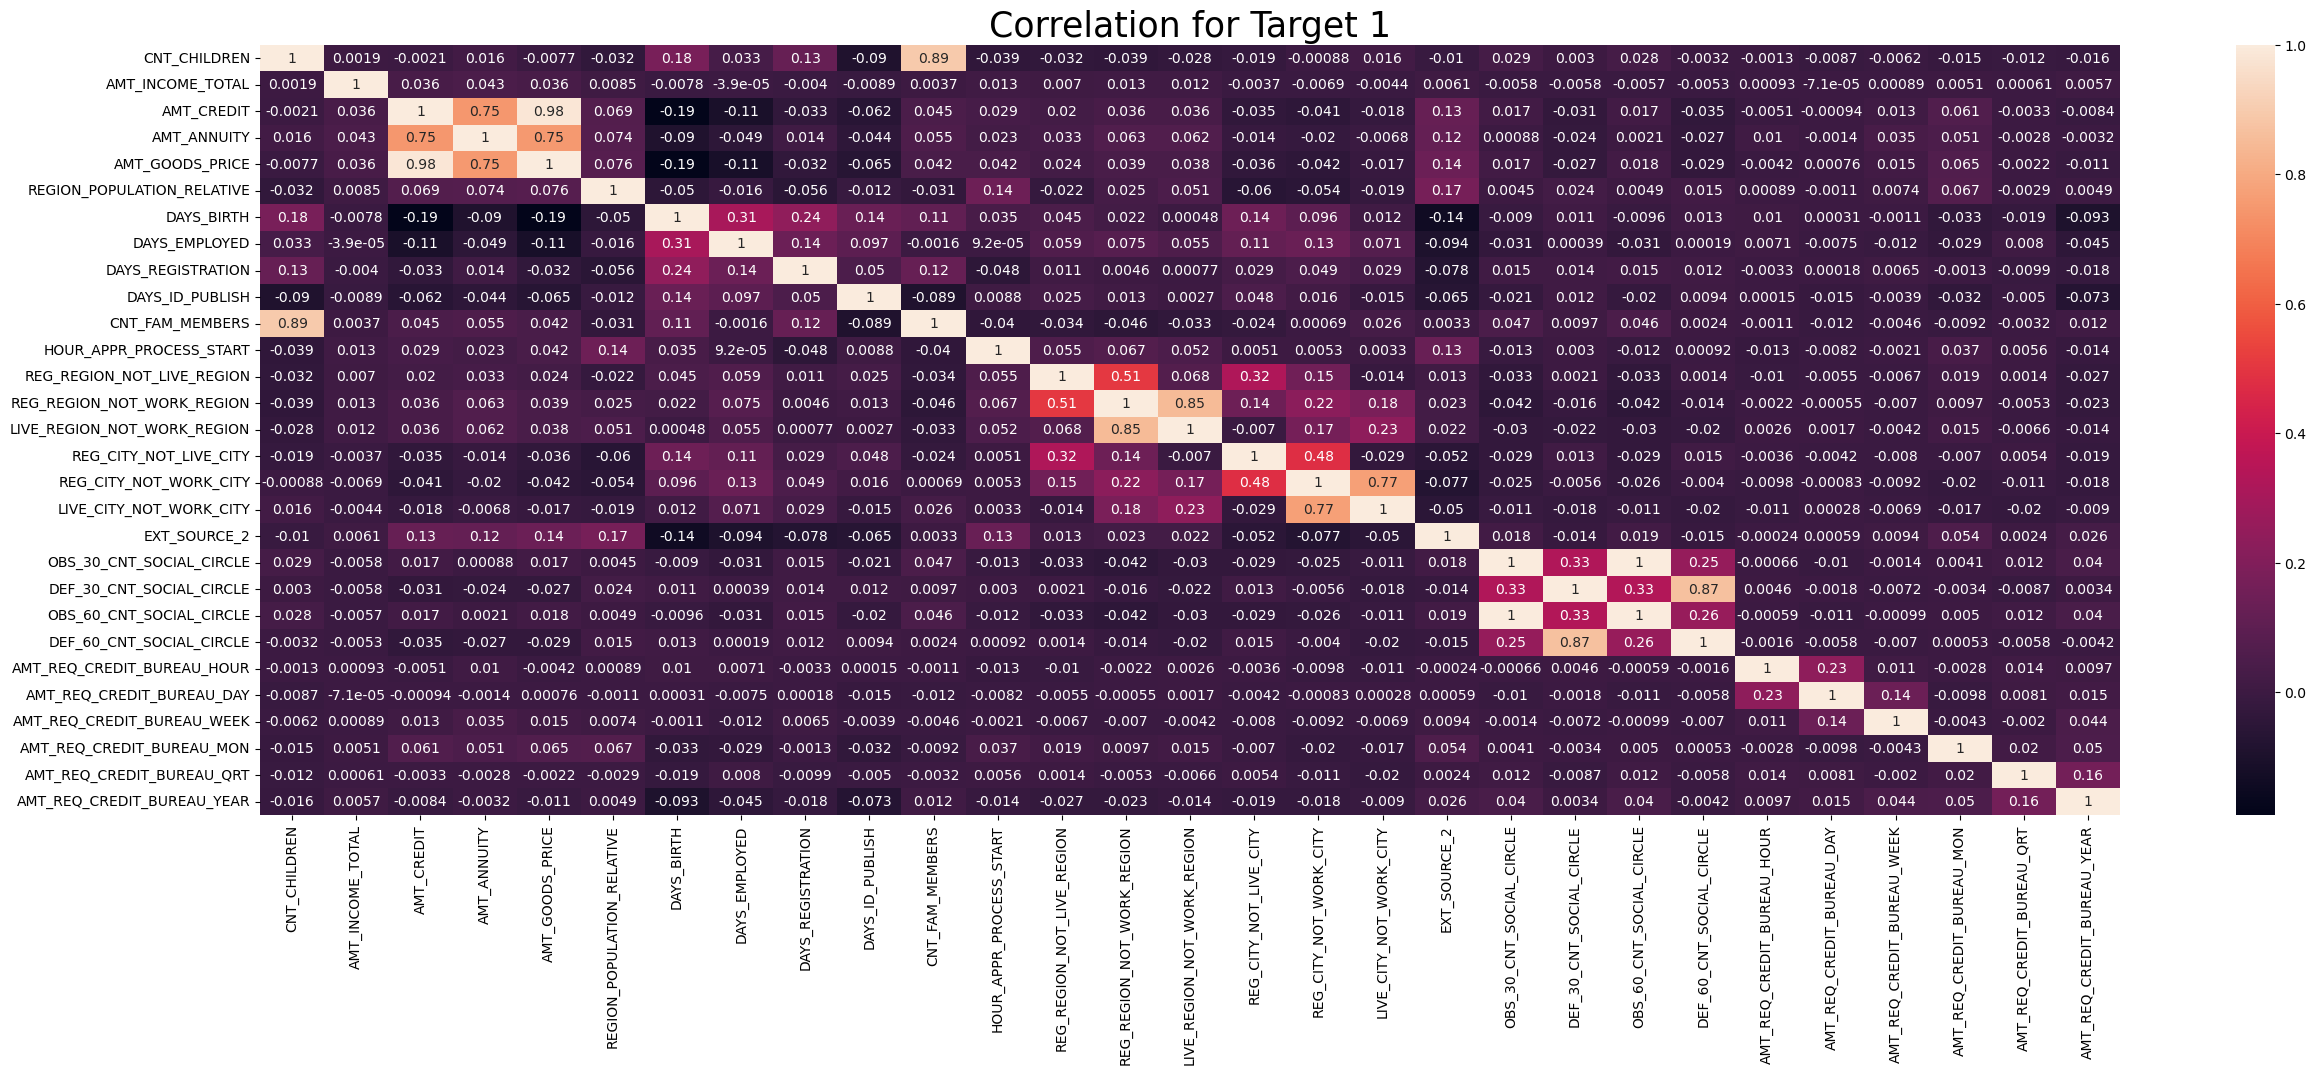

In [75]:
# Plotting the correlation for the Target 1.

plt.figure(figsize=[30,10])
sns.heatmap(target_1_corr, annot=True)
plt.title('Correlation for Target 1', fontsize=25)
plt.show()

Conclusions :


The client's permanent address does not match contact address are having less children and vice-ve.rsa
The client's permanent address does not match work address are having less children and vice-v.ersa

# Bivariate Analysis 

In [72]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

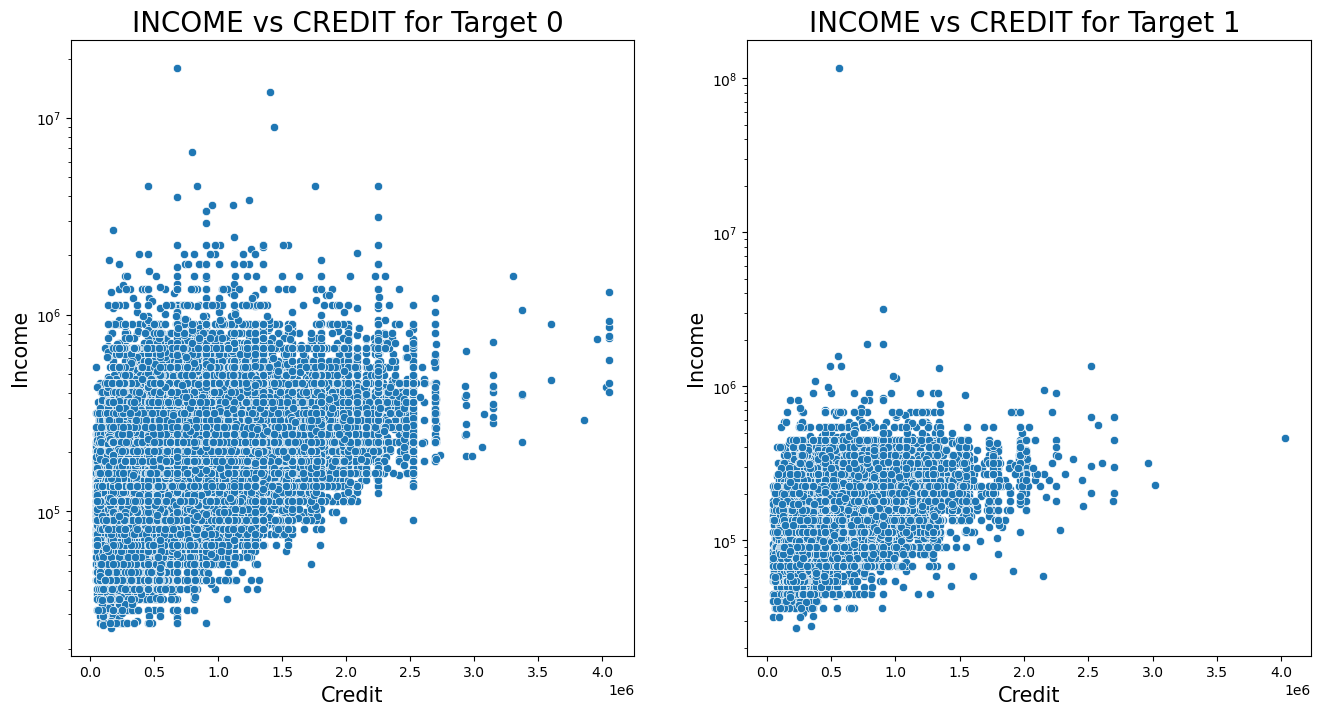

In [77]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x=tg0.AMT_CREDIT, y=tg0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target 0 ', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Income', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x=tg1.AMT_CREDIT, y=tg1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target 1 ', fontsize=20)
plt.yscale('log')
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Income', fontsize=15)

plt.show()

In [ ]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.

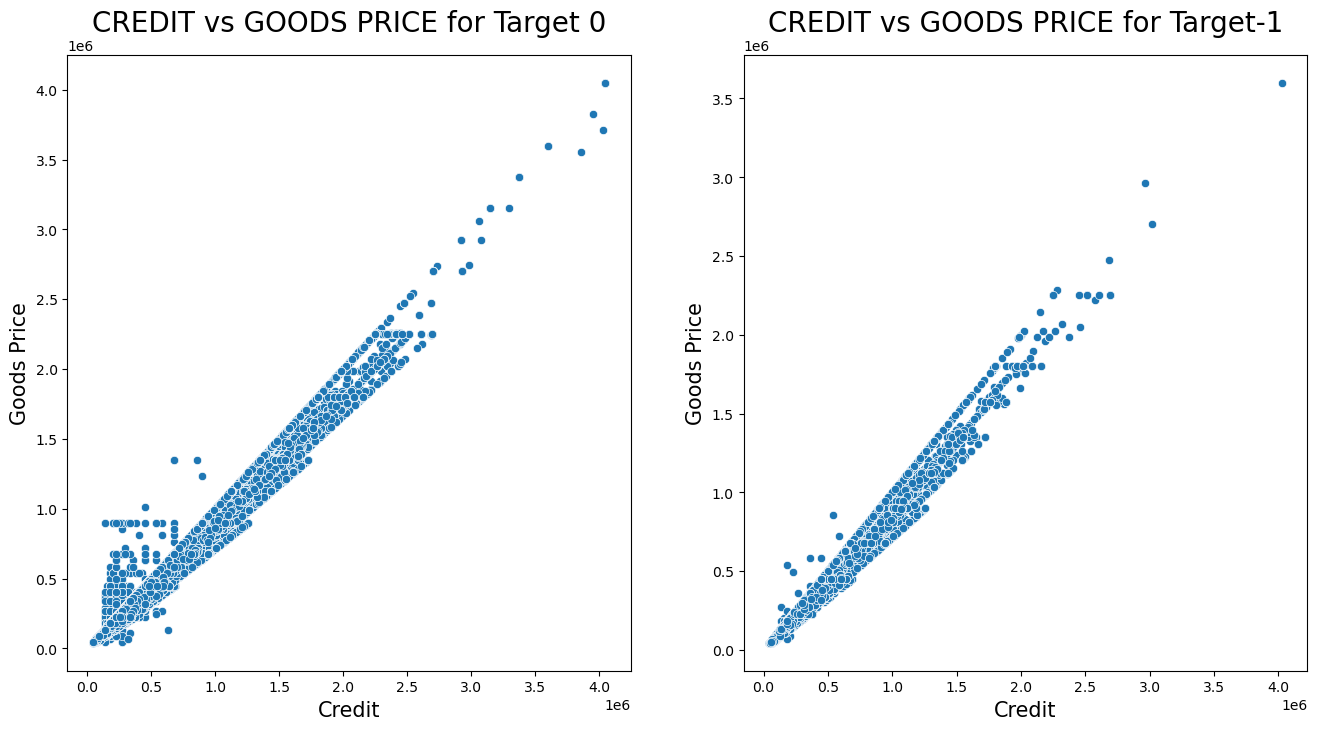

In [78]:
plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=tg0)
plt.title('CREDIT vs GOODS PRICE for Target 0', fontsize=20)
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Goods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=tg1)
plt.title('CREDIT vs GOODS PRICE for Target-1', fontsize=20)
plt.xlabel('Credit', fontsize=15)
plt.ylabel('Goods Price', fontsize=15)

plt.show()

Conclusions :
- With the scatter plot,we can determine that AMT CREDIT and AMT GOODS PRICE are highly correlated,which means if increase in goods price,the credit increased directly and vice versa.

# Finding Outliers


For Target 0

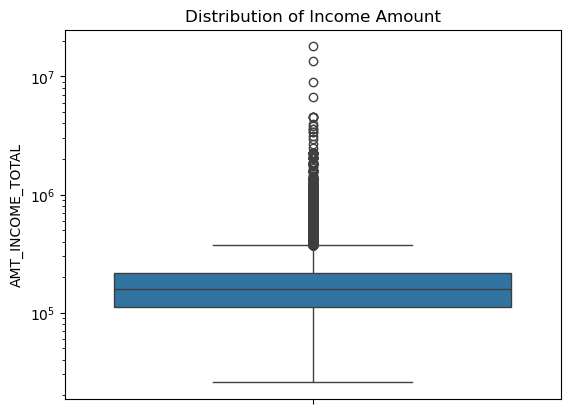

In [79]:
# Distribution of Income Amount
sns.boxplot(data=tg0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.title('Distribution of Income Amount')
plt.show()

Conclusions :
- There seems to be an equal distribution of the Income amount of the clients.
- Also some of the outliers present in the dataset.

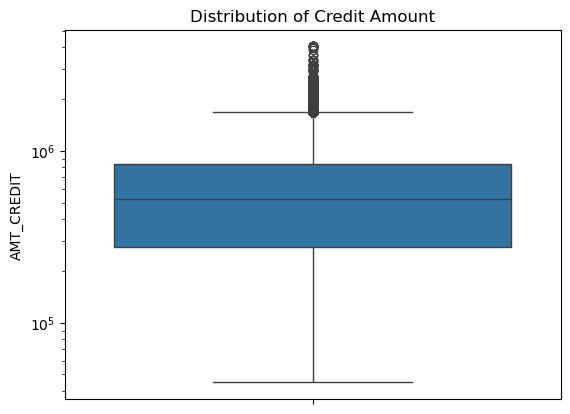

In [80]:
# Distribution of Credit Amount
sns.boxplot(data=tg0, y='AMT_CREDIT')
plt.yscale('log')
plt.title('Distribution of Credit Amount')
plt.show()

Conclusions :

- The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile.
- There seems some outliers in the Credit boxplot.

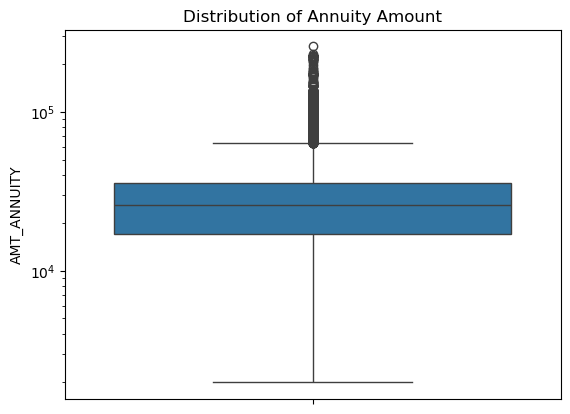

In [81]:
# Distribution of Annuity
sns.boxplot(data=tg0, y='AMT_ANNUITY')
plt.yscale('log')
plt.title('Distribution of Annuity Amount')
plt.show()

Conclusions :

- The first quartile is bigger than the third quartile.
- There seems some outliers in the Anuuity boxplot.

For Target 1

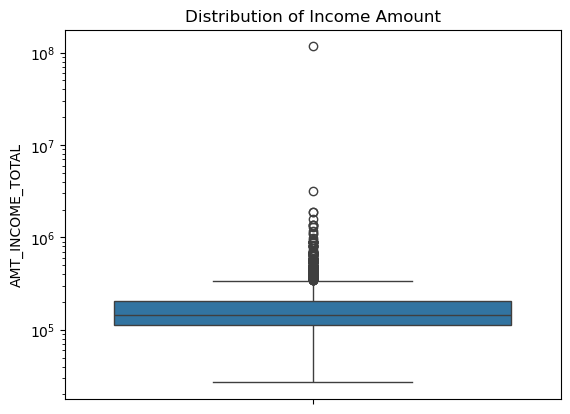

In [82]:
# Distribution of Income Amount
sns.boxplot(data=tg1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.title('Distribution of Income Amount')
plt.show()

Conclusions :

- There seems a significant outlier in the Income dataset.
- Most of the income of the client lies in the third quartile.

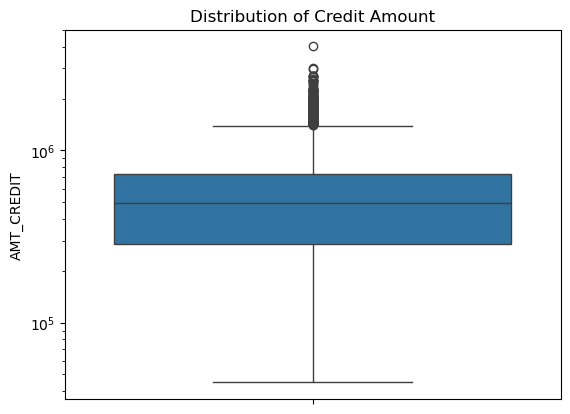

In [83]:
# Distribution of Credit Amount
sns.boxplot(data=tg1, y='AMT_CREDIT')
plt.yscale('log')
plt.title('Distribution of Credit Amount')
plt.show()

Conclusions :

- The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile.
- There seems some outliers in the Credit boxplot.

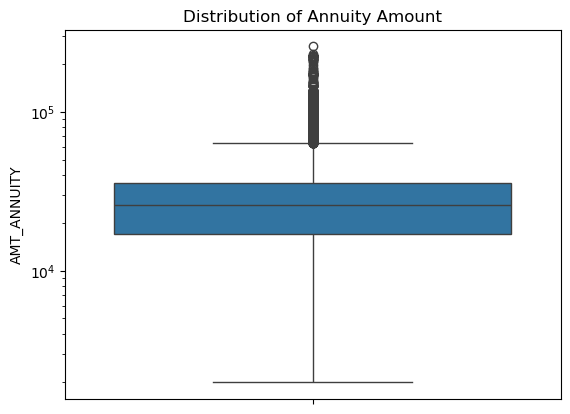

In [84]:
# Distribution of Annuity
sns.boxplot(data=tg0, y='AMT_ANNUITY')
plt.yscale('log')
plt.title('Distribution of Annuity Amount')
plt.show()

Conclusions :

- The first quartile is bigger than the third quartile.
- There seems some outliers in the Anuuity boxplot.

# Multivariate Analysis

Target  0

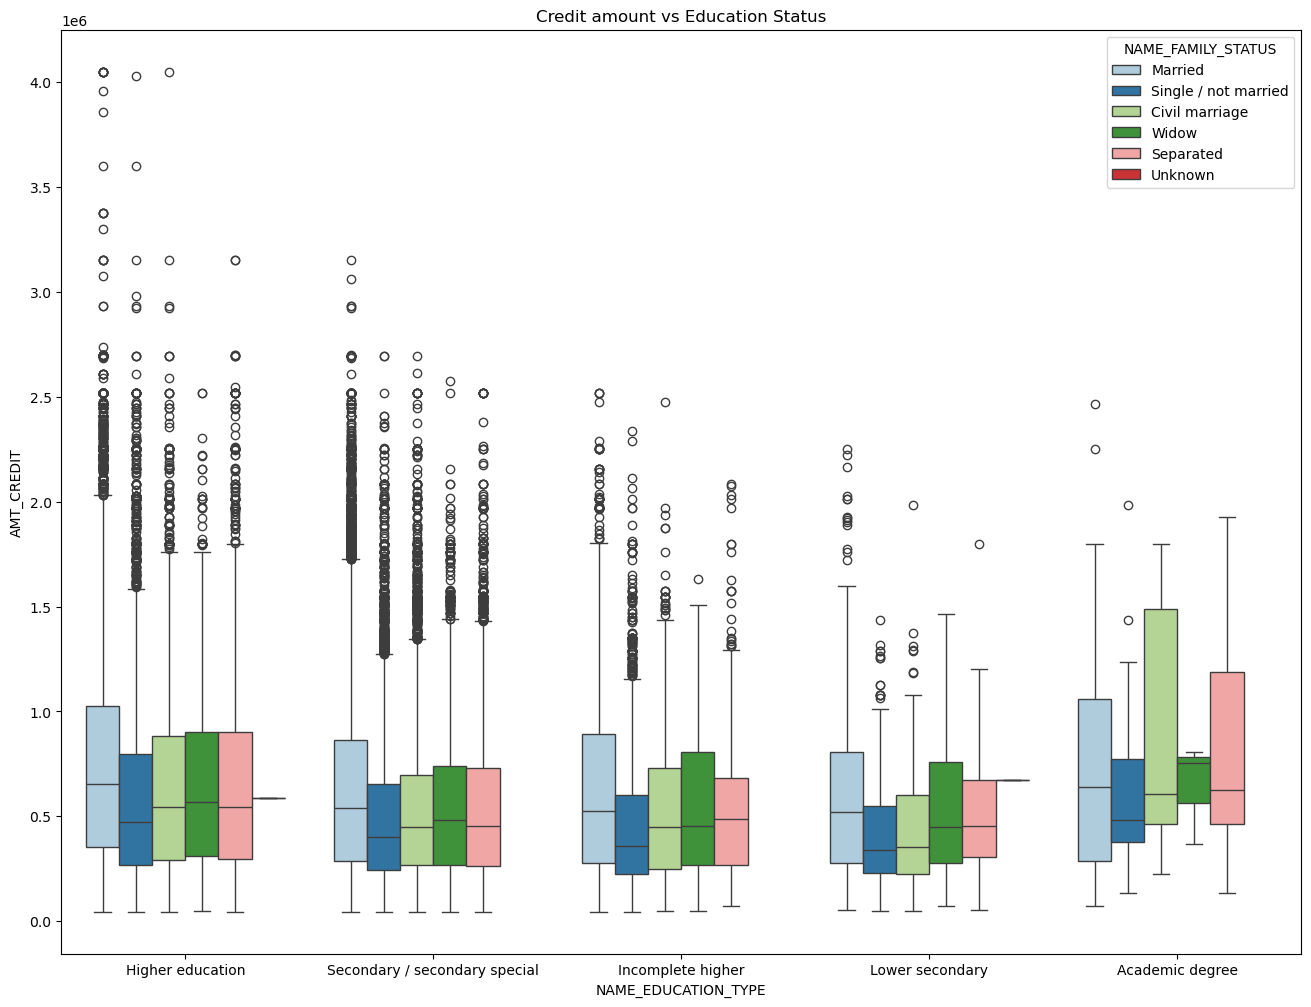

In [85]:
# Credit Amount
plt.figure(figsize=[16,12])
sns.boxplot(data =tg0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette='Paired')
plt.title('Credit amount vs Education Status')
plt.show()

Conclusions :

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

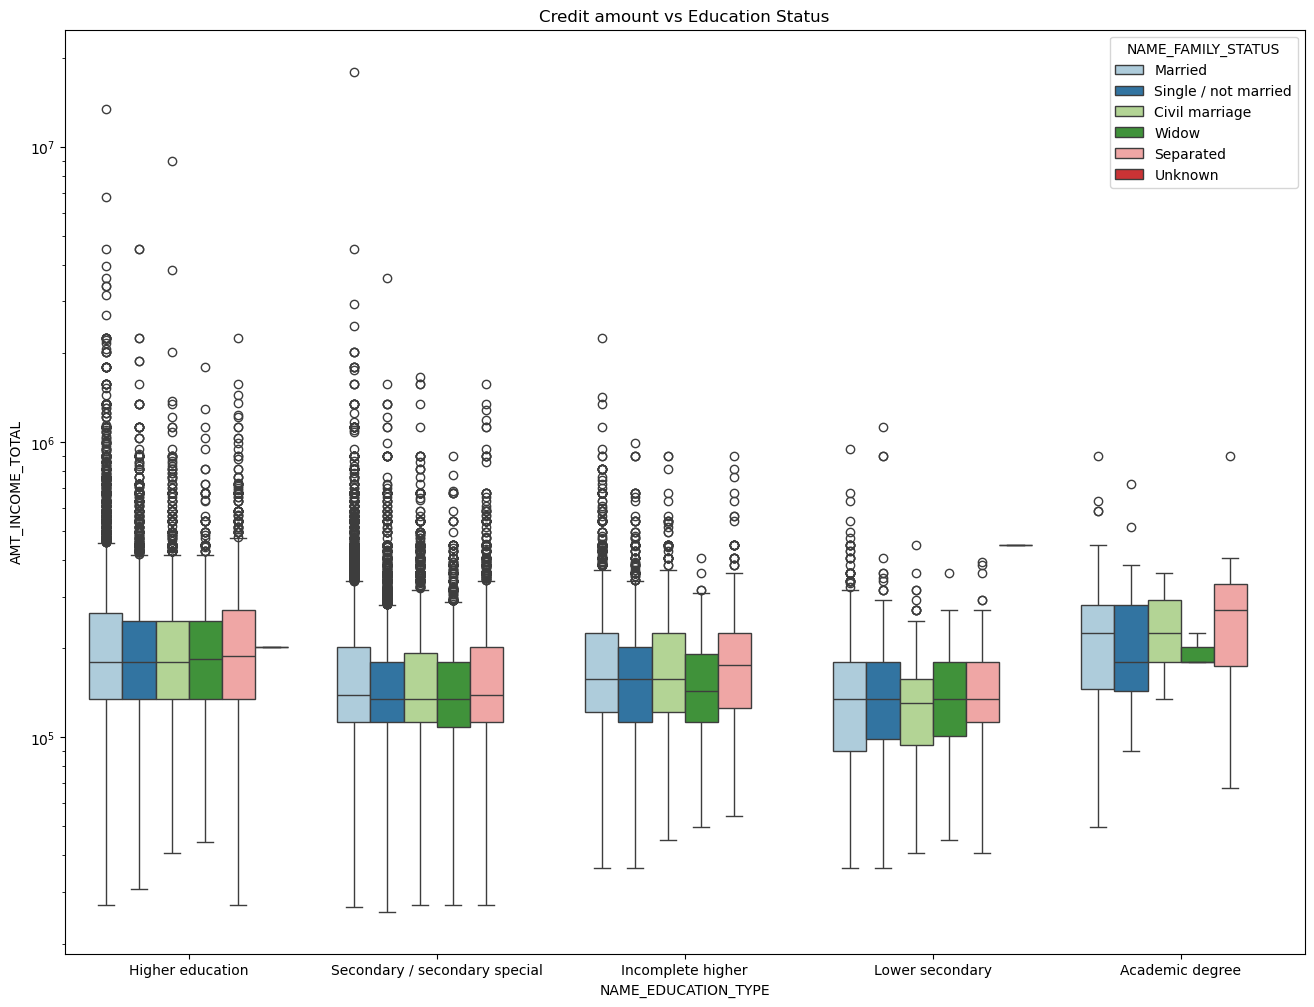

In [95]:
# Income Amount
plt.figure(figsize=[16,12])
sns.boxplot(data =tg0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS', palette='Paired')
plt.title('Amount Income Total vs Education Status')
plt.yscale('log')
plt.show()

Conclusions :

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

Target  1

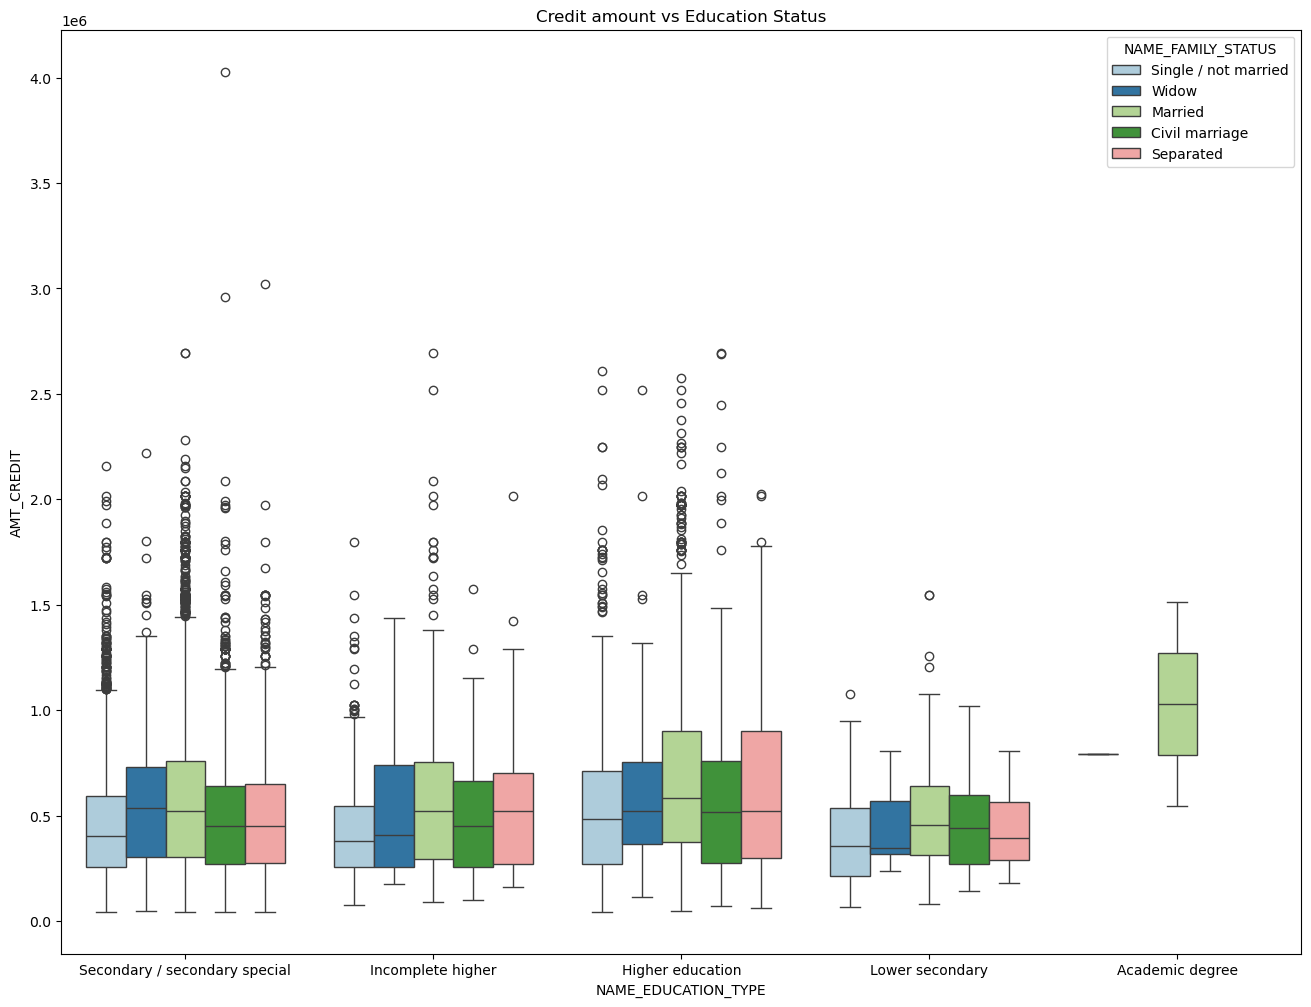

In [87]:
# Credit Amount
plt.figure(figsize=[16,12])
sns.boxplot(data =tg1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', palette='Paired')
plt.title('Credit amount vs Education Status')
plt.show()

Conclusions :

From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

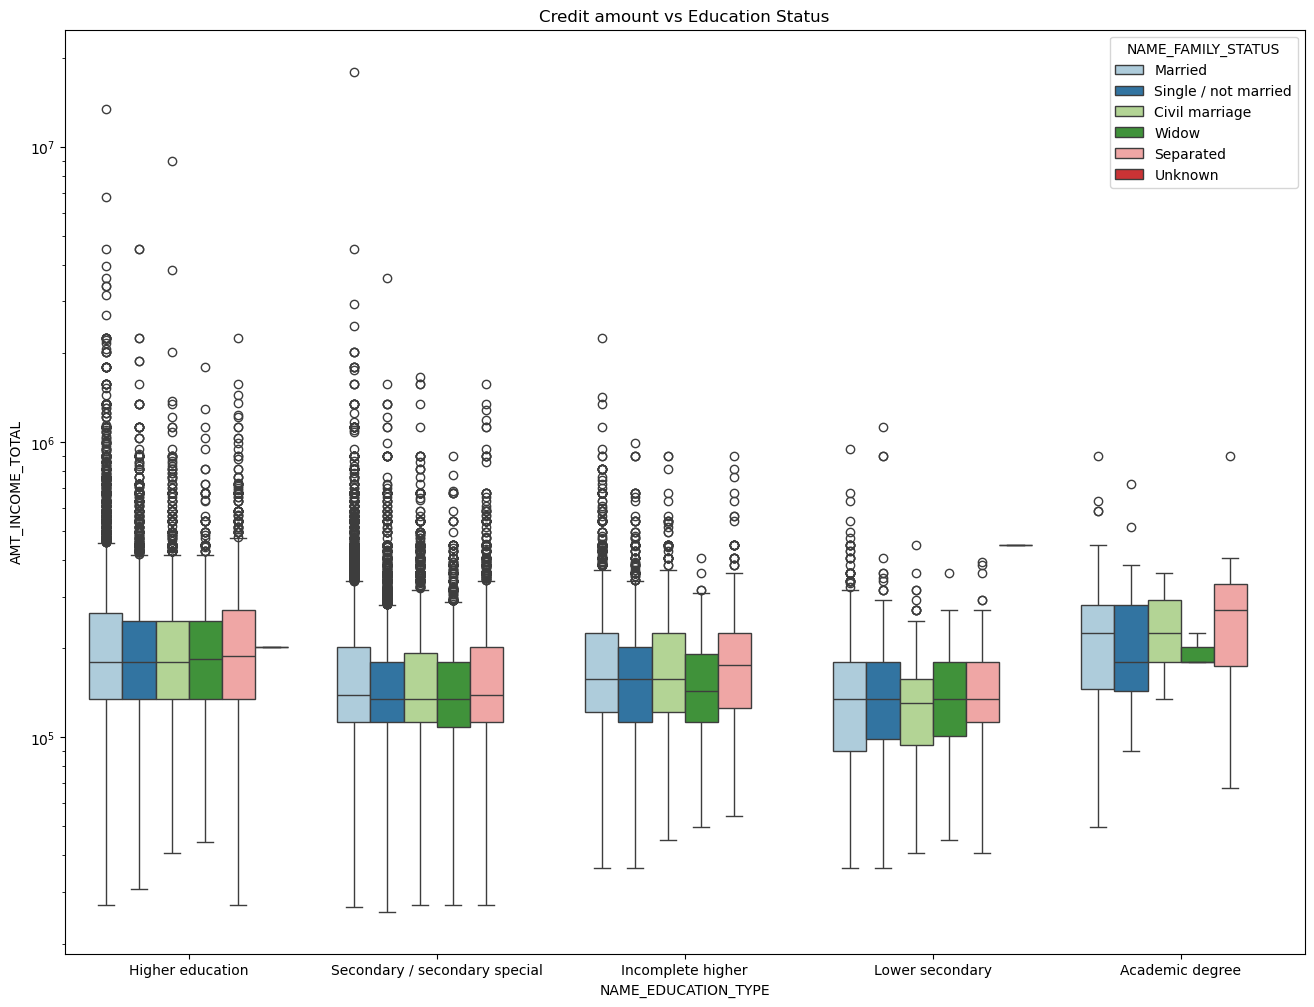

In [96]:
# Income Amount
plt.figure(figsize=[16,12])
sns.boxplot(data =tg1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS', palette='Paired')
plt.title('Credit amount vs Education Status')
plt.yscale('log')
plt.show()

Conclusions :

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

# Work on previous_application dataset

In [89]:
# Checking the NAME_CASH_LOAN_PURPOSE column for any unique data,

df2_pv.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [90]:
# Removing the 'XNA' and 'XAP' column values from the column,

df2_pv = df2_pv.drop(df2_pv[df2_pv.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
df2_pv = df2_pv.drop(df2_pv[df2_pv.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [91]:
df2_pv.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

# Merging the two datasets

In [92]:
loan_merg = pd.merge(left = df1_ap, right = df2_pv, how = 'inner', on = 'SK_ID_CURR')
loan_merg.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100034       0      Revolving loans           M            N   
1      100035       0           Cash loans           F            N   
2      100039       0           Cash loans           M            Y   
3      100046       0      Revolving loans           M            Y   
4      100046       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY  \
0               Y             0           90000.0      180000.0       9000.0   
1               Y             0          292500.0      665892.0      24592.5   
2               N             1          360000.0      733315.5      39069.0   
3               Y             0          180000.0      540000.0      27000.0   
4               Y             0          180000.0      540000.0      27000.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         180000.0   Unaccompanied               Working   
1         477000.0   Unaccompanied  Commercial associate   
2         679500.0   Unaccompanied  Commercial associate   
3         540000.0   Unaccompanied               Working   
4         540000.0   Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0               Higher education  Single / not married       With parents   
1  Secondary / secondary special        Civil marriage  House / apartment   
2  Secondary / secondary special               Married  House / apartment   
3               Higher education               Married  House / apartment   
4               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.030755      -10341          -1010              -4799   
1                    0.025164      -15280          -2668              -5266   
2                    0.015221      -11694          -2060              -3557   
3                    0.025164      -16126          -1761              -8236   
4                    0.025164      -16126          -1761              -8236   

   DAYS_ID_PUBLISH  CNT_FAM_MEMBERS WEEKDAY_APPR_PROCESS_START_x  \
0            -3015              1.0                      TUESDAY   
1            -3787              2.0                    WEDNESDAY   
2            -3557              3.0                     THURSDAY   
3            -4292              2.0                      TUESDAY   
4            -4292              2.0                      TUESDAY   

   HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  \
0                         16                           0   
1                         13                           0   
2                         10                           0   
3                          8                           0   
4                          8                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       1                       1                        0   
3                       0                       0                        0   
4                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.502779                         0   
1  Business Entity Type 3      0.479987       

In [93]:
# Renaming the columns in the loan_merg datasets,

loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [97]:
# Removing the unwanted columns from the dataset for the ease of analysis

loan_merg.drop(['SK_ID_CURR','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

# Univariate analysis


In [98]:
# Contract Status

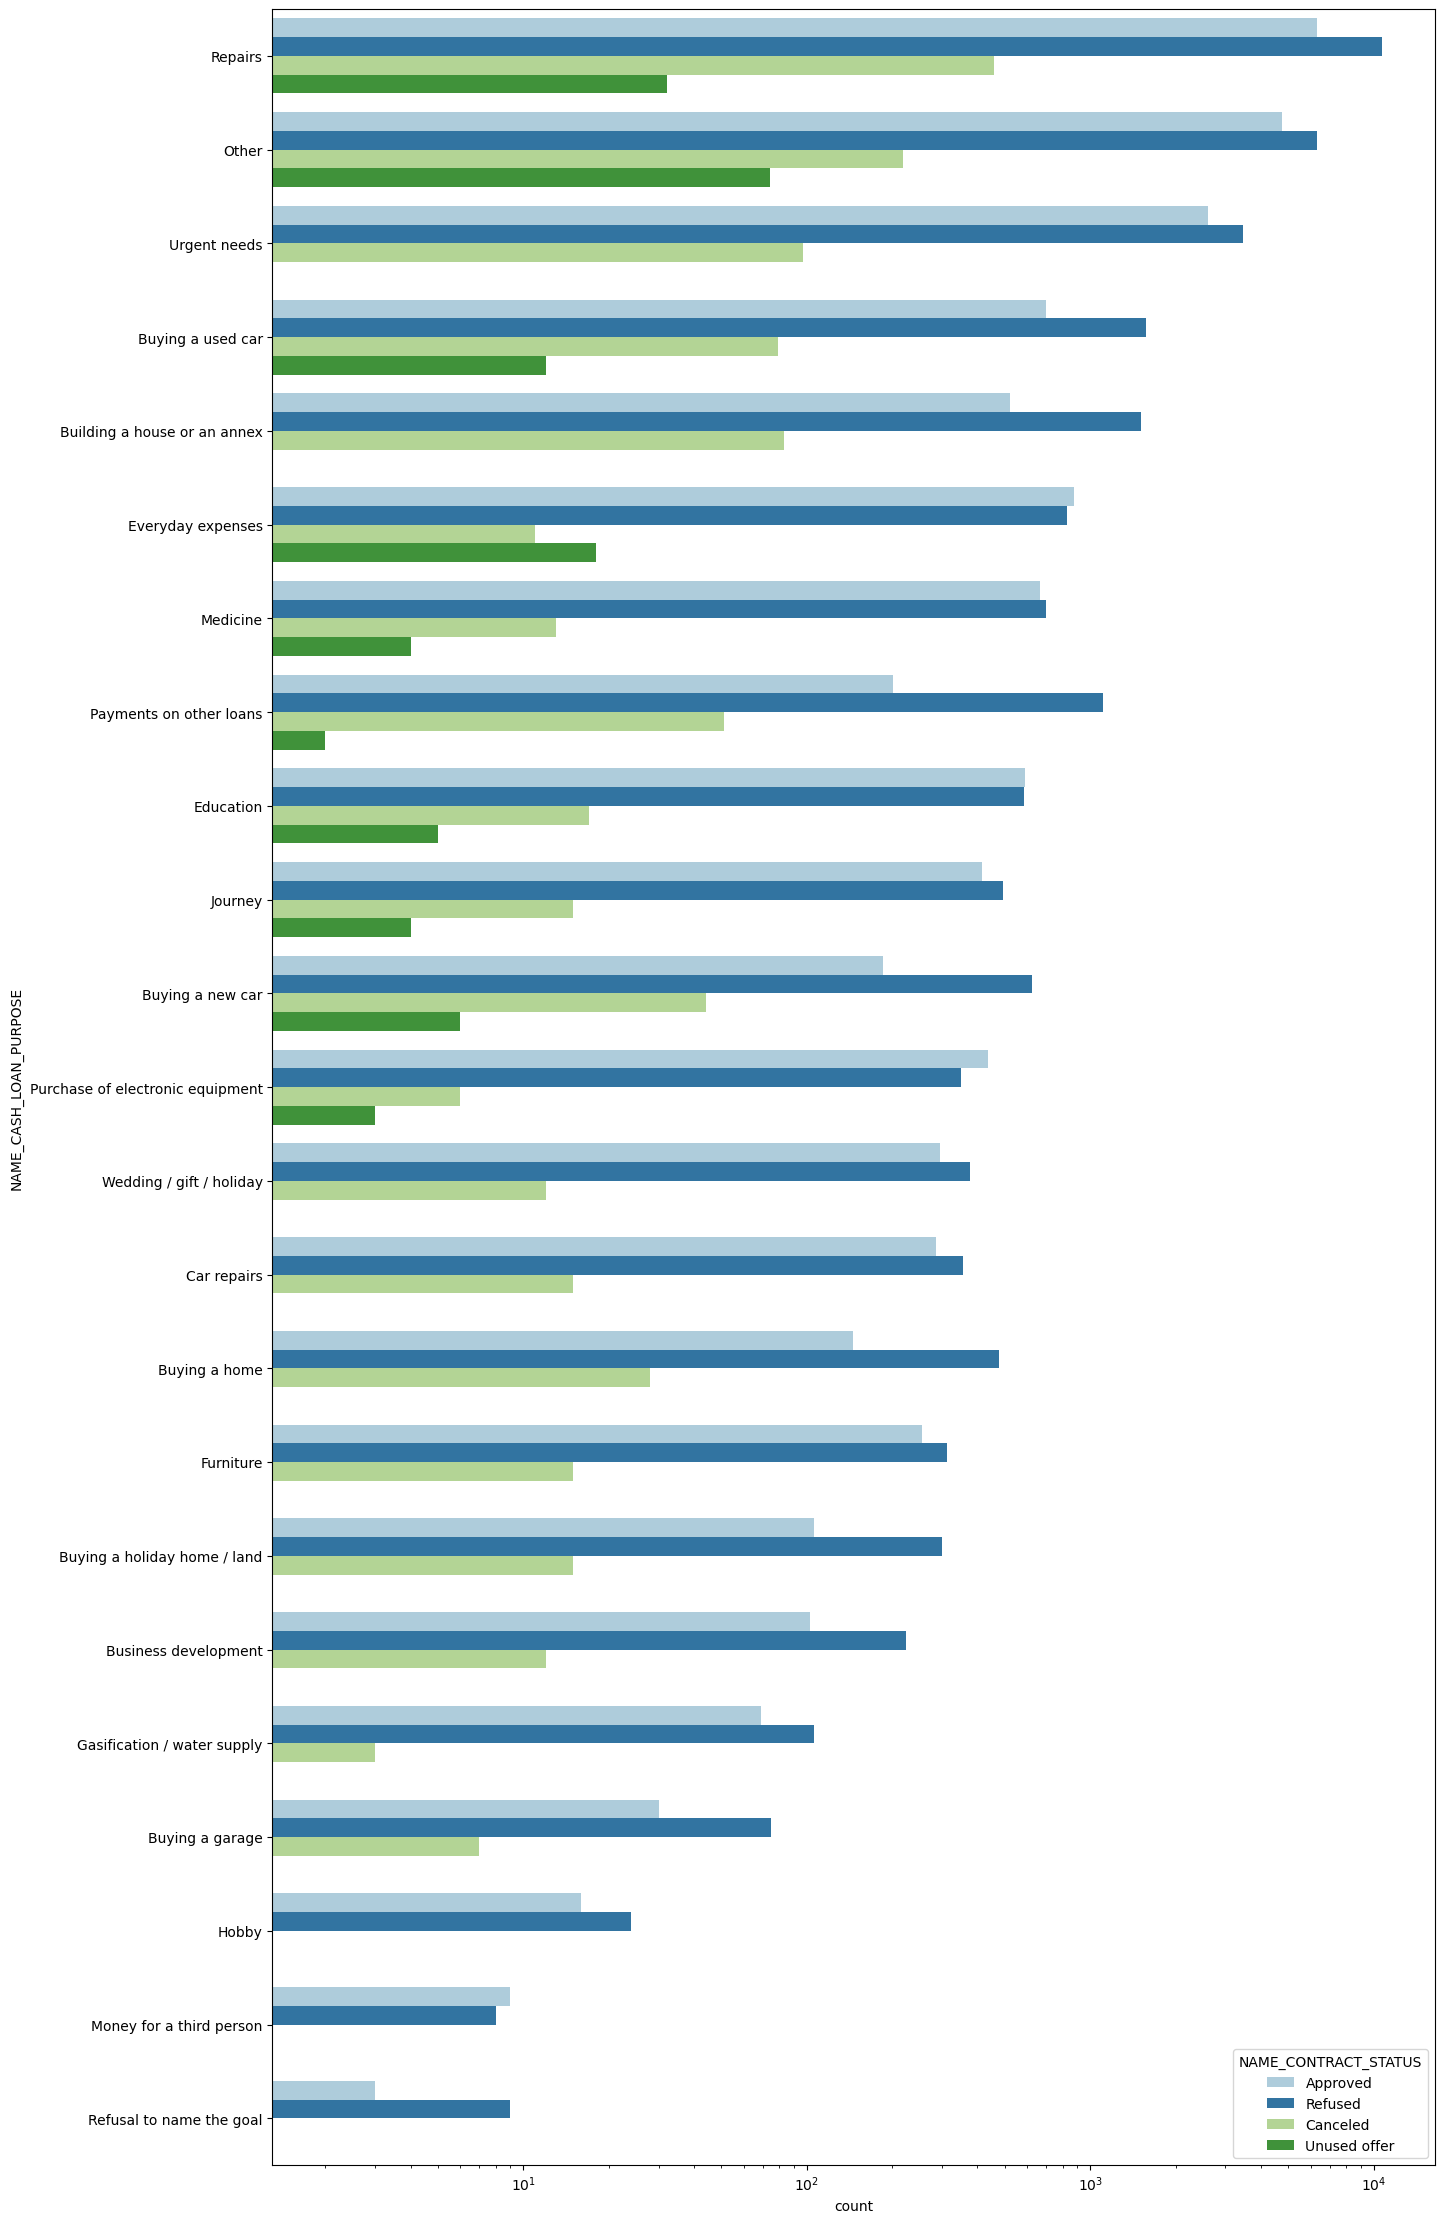

In [99]:
plt.figure(figsize=[15,28])
sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='Paired')
plt.xscale('log')
plt.show()

Conclusions :

- Most rejection of loans came from purpose 'Repairs'.
- For education purposes we have equal number of approves and rejection.
- Paying other loans and buying a new car is having significant higher rejection than approves.

In [100]:
# Contract Status

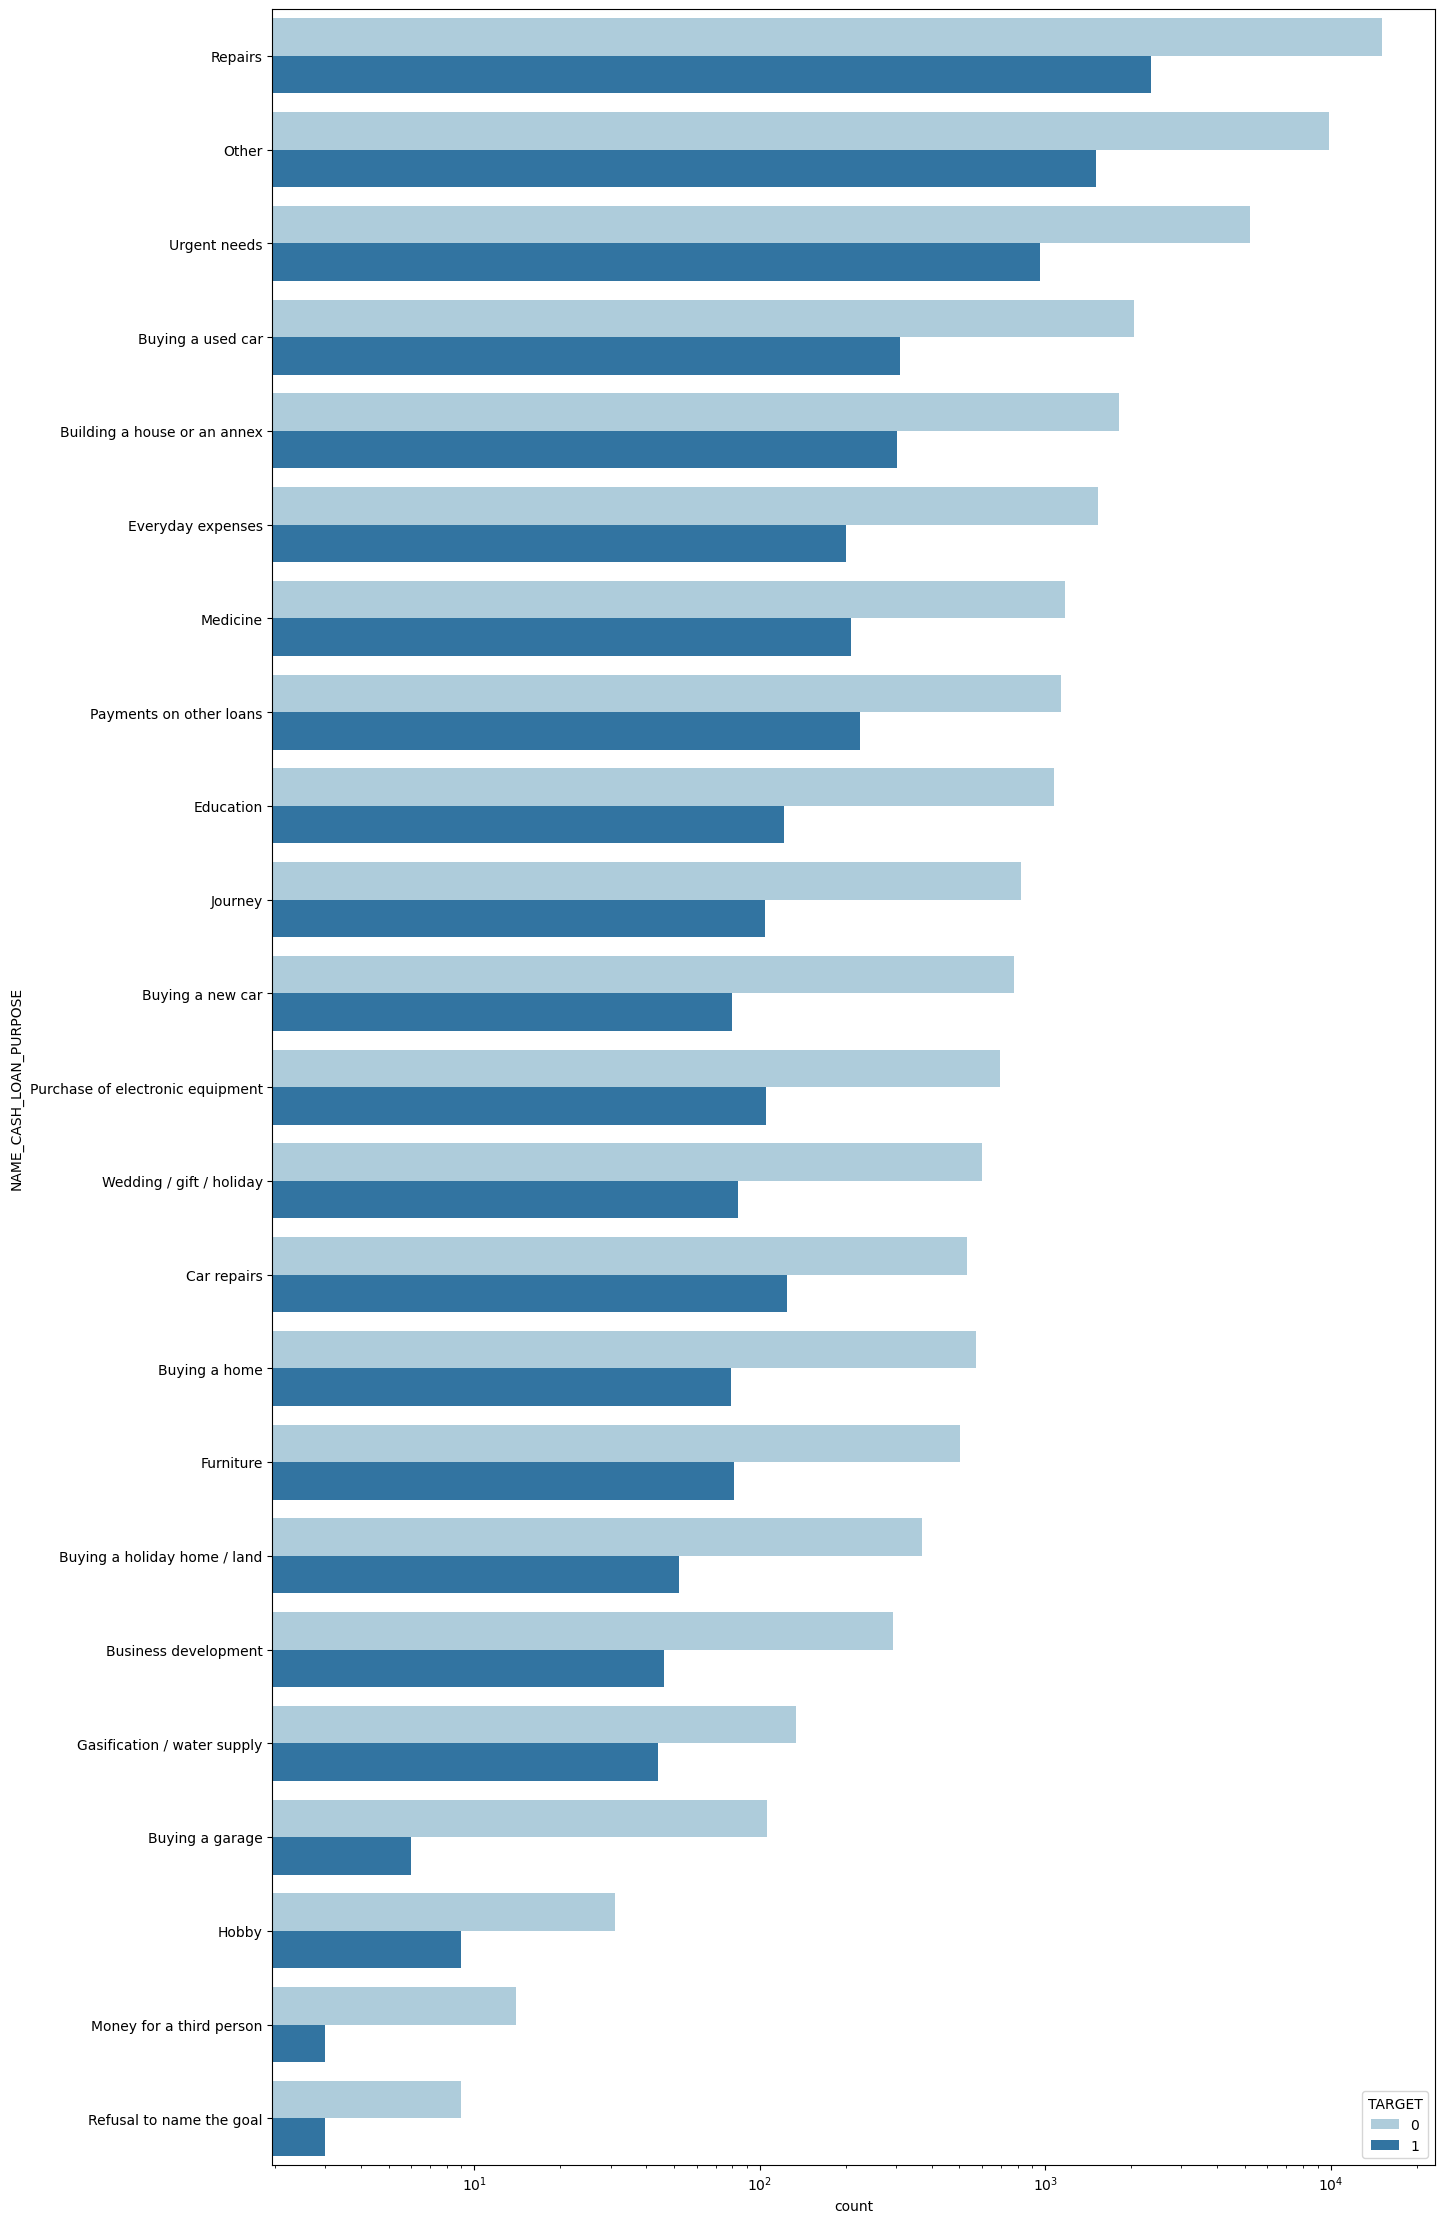

In [101]:
plt.figure(figsize=[15,28])
sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='Paired')
plt.xscale('log')
plt.show()

Conclusions :

Loan purposes with 'Repairs' are facing more difficulites in payment on time
There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

# bivariate analysis

In [102]:
# Plotting for Credit amount in logarithmic scale

C:\Users\HP\AppData\Local\Temp\ipykernel_10084\555572649.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data = loan_merg, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_x',ci=None, palette='Paired')


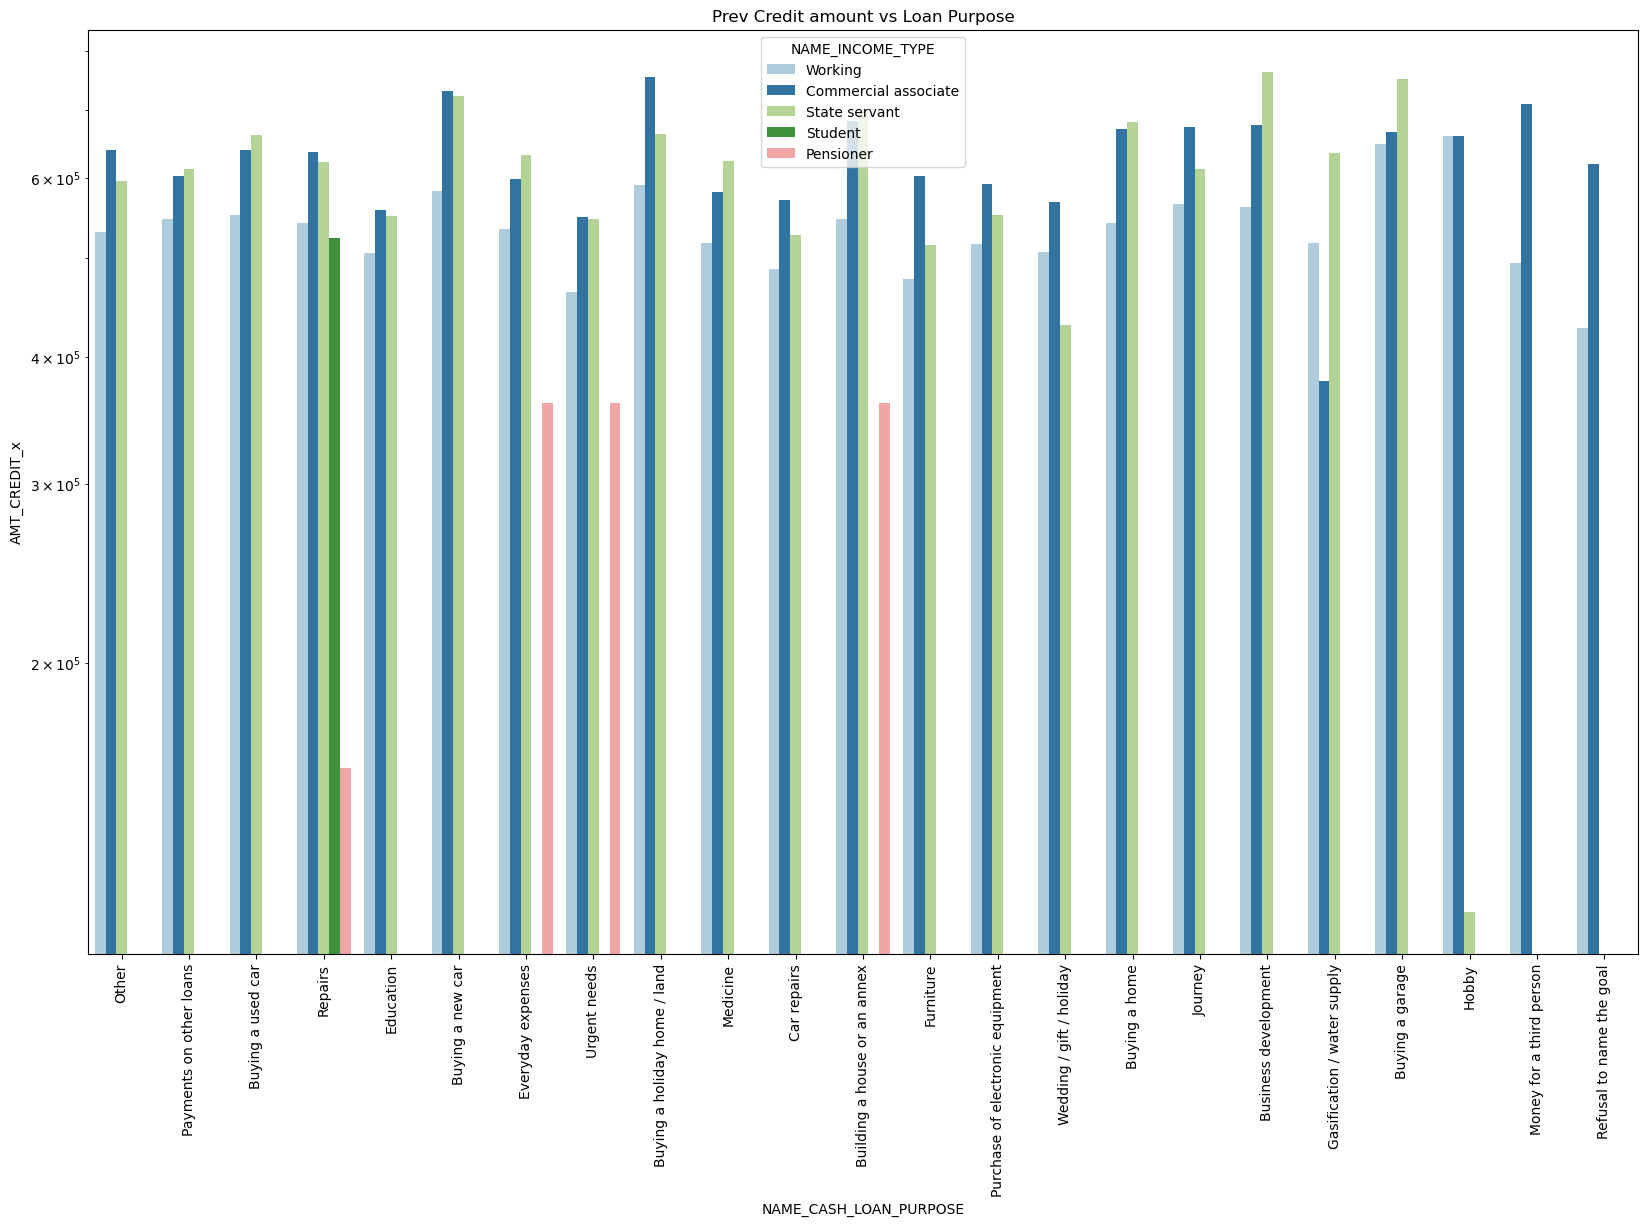

In [105]:
plt.figure(figsize=(20,12))

sns.barplot(data = loan_merg, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_x',ci=None, palette='Paired')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

Conclusions :

- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
- Income type of state servants have a significant amount of credit applied
- Money for third person or a Hobby is having less credits applied for.

In [ ]:
# Plotting for Credit amount prev vs Housing type,

C:\Users\HP\AppData\Local\Temp\ipykernel_10084\1420325822.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data =loan_merg, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE',ci=None, palette='Paired')


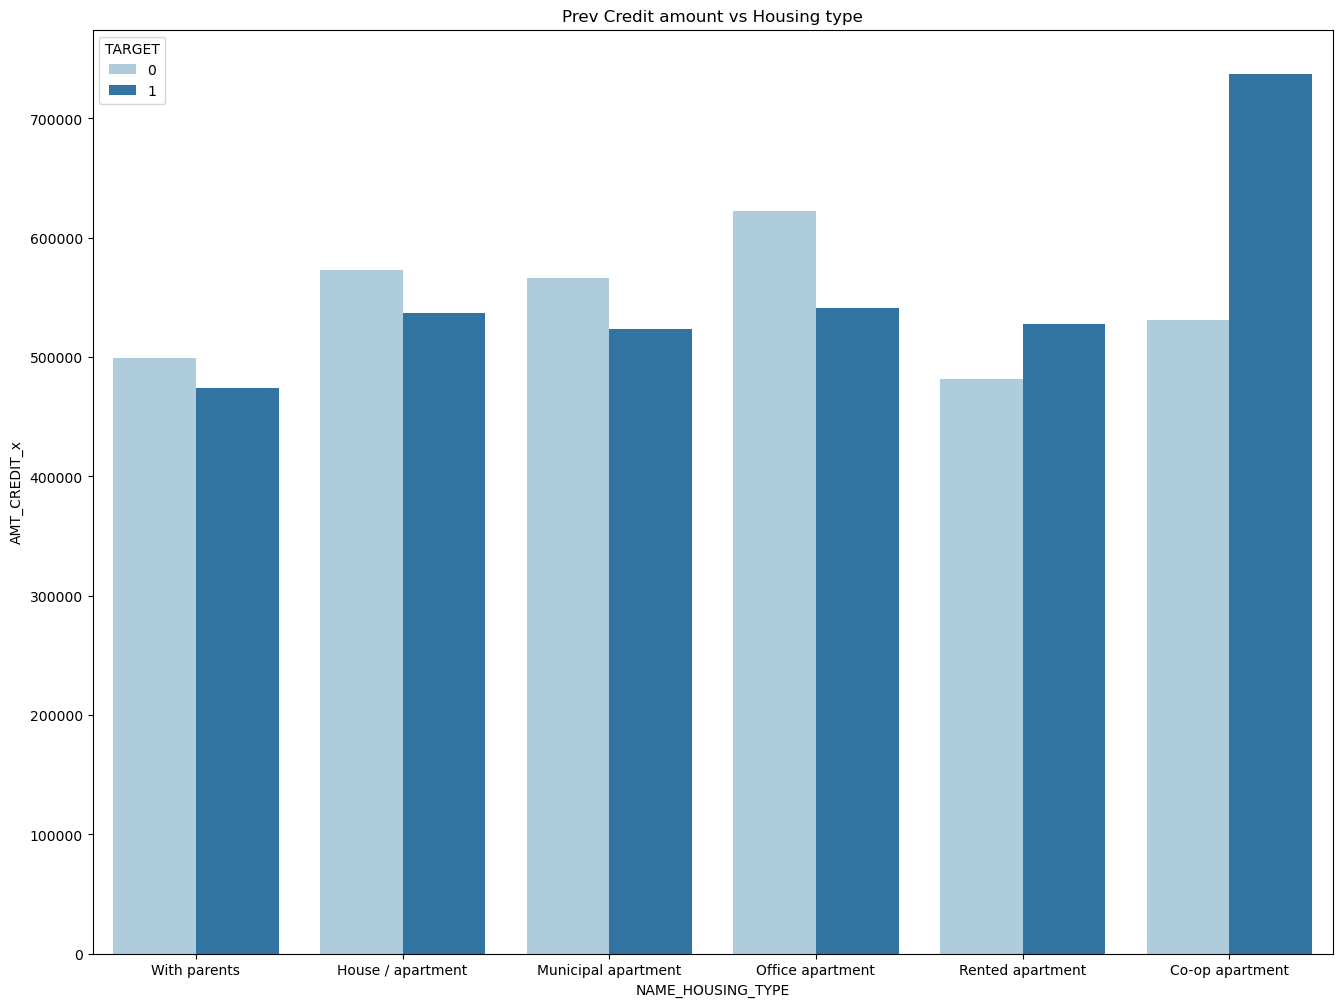

In [107]:
plt.figure(figsize=(16,12))
sns.barplot(data =loan_merg, y='AMT_CREDIT_x',hue='TARGET',x='NAME_HOUSING_TYPE',ci=None, palette='Paired')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Conclusions :

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target=1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# Conclusions of this loan data analysis :

- Banks should prioritize loan approvals for Office Apartment and Co-Op Apartment housing types, as they are associated with fewer payment difficulties.

- Loan offerings should be expanded for purposes such as Repairs and Others, as these categories present viable opportunities for lending.

- Lending focus should include Business Entity Type-3 and Self-Employed individuals, as they demonstrate potential for reliable repayments.

- Working professionals, particularly female employees, should be a key target demographic for loan products, given their strong repayment tendencies.